# 필요 모듈 로딩

In [20]:
# 필요 모듈을 로딩합니다.

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

# 챌린져 데이터 셋 로딩

In [21]:
# 챌린처 랭크 게임데이터 셋을 불러옵니다.
lol_chl = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/Challenger_Ranked_Games.csv")
lol_chl

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


# gameId칼럼 제거(FE)

In [22]:
# gameId 칼럼을 제거해 줍니다.
lol_chl.drop("gameId", axis=1, inplace = True)
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,1837,1,1,0,0,1,0,3,0,5,...,29,88366,52625,660,70,14.0,168,5,25003,45455


# 컬럼별 분포 확인

In [23]:
lol_chl.columns

Index(['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
      dtype='o

In [28]:
col = ['blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel']
print(col)
print("")
print("col의 개수 :", len(col))

['blueDragonKills', 'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold', 'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel']

col의 개수 : 14


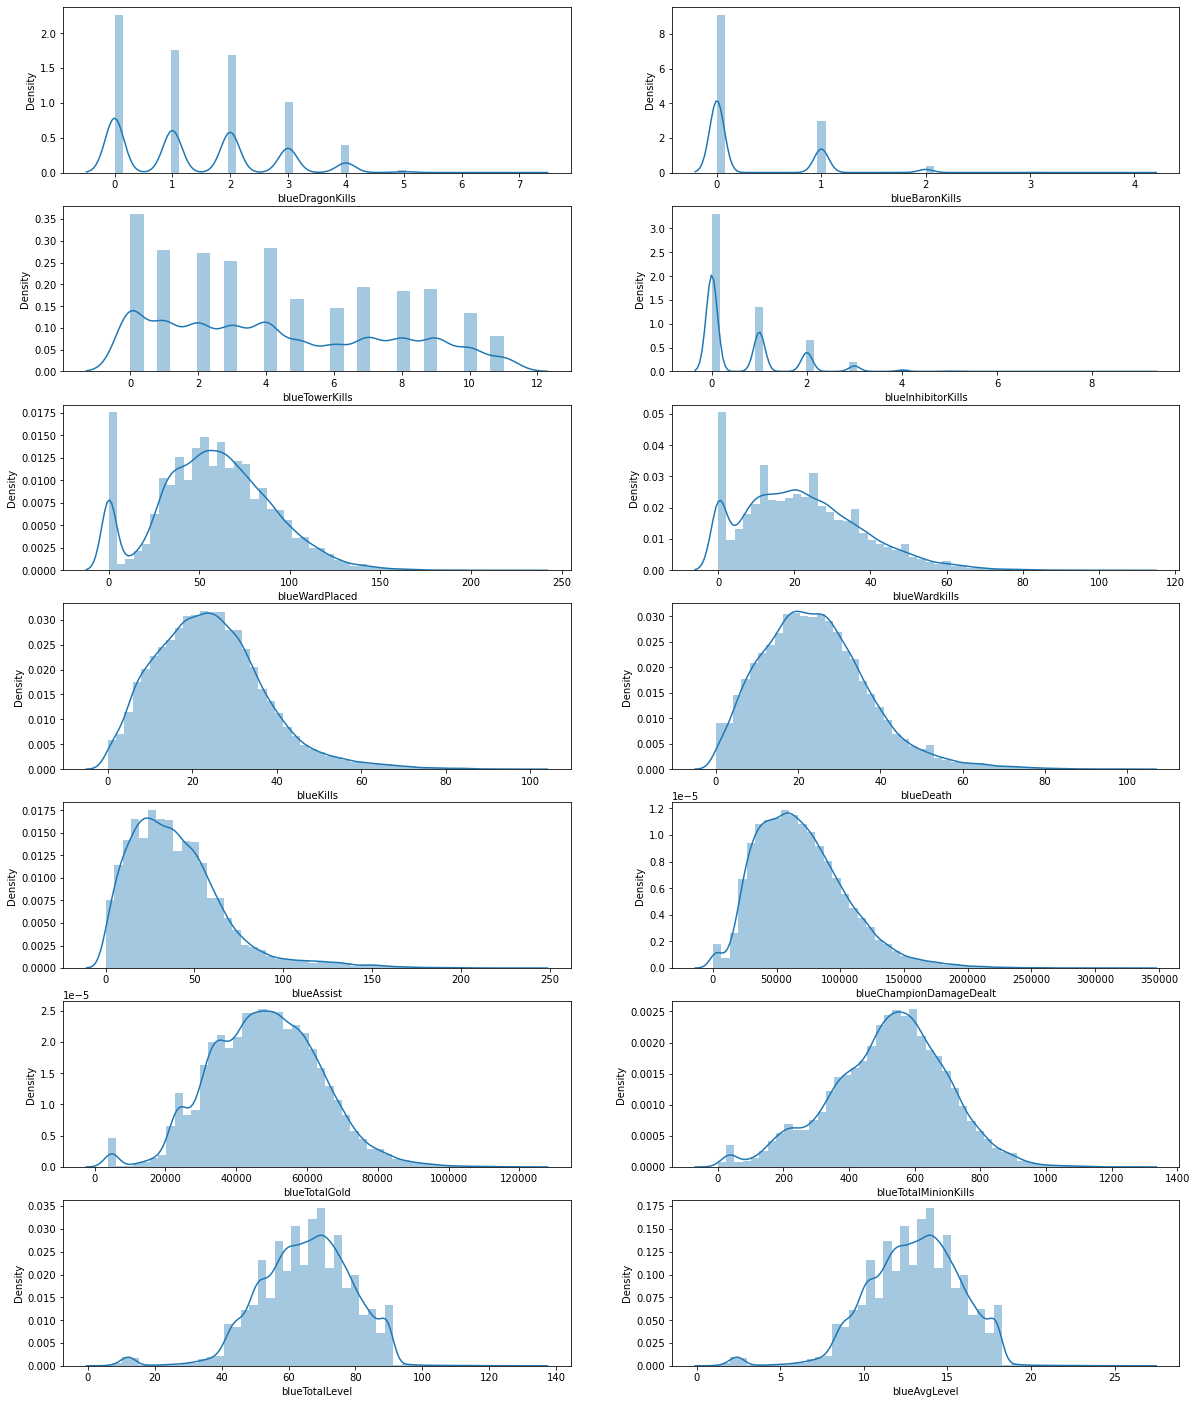

In [29]:
row_index = [0,0,1,1,2,2,3,3,4,4,5,5,6,6]
col_index =  [0,1,0,1,0,1,0,1,0,1,0,1,0,1] 

fig, axs = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 25))

for col, r, c in zip(col, row_index, col_index): 
    sns.distplot(lol_chl[col], kde = True,  ax = axs[r][c])

# 이상치 제거(FE)

## 블루팀총합 레벨이 40이하인 게임은 제거합니다.

In [7]:
# 블루팀총합 레벨이 40이하인 게임은 제거해서 lol_chl에 담아줍니다.
lol_chl = lol_chl[lol_chl["blueTotalLevel"] > 40]
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,1837,1,1,0,0,1,0,3,0,5,...,29,88366,52625,660,70,14.0,168,5,25003,45455


## 레드팀총합 레벨이 40이하인 게임은 제거합니다.

In [8]:
# 레드팀총합 레벨이 40이하인 게임은 제거해서 lol_chl에 담아줍니다.
lol_chl = lol_chl[lol_chl["redTotalLevel"] > 40]
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,28,45732,37657,490,57,11.4,89,4,17334,16396
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675


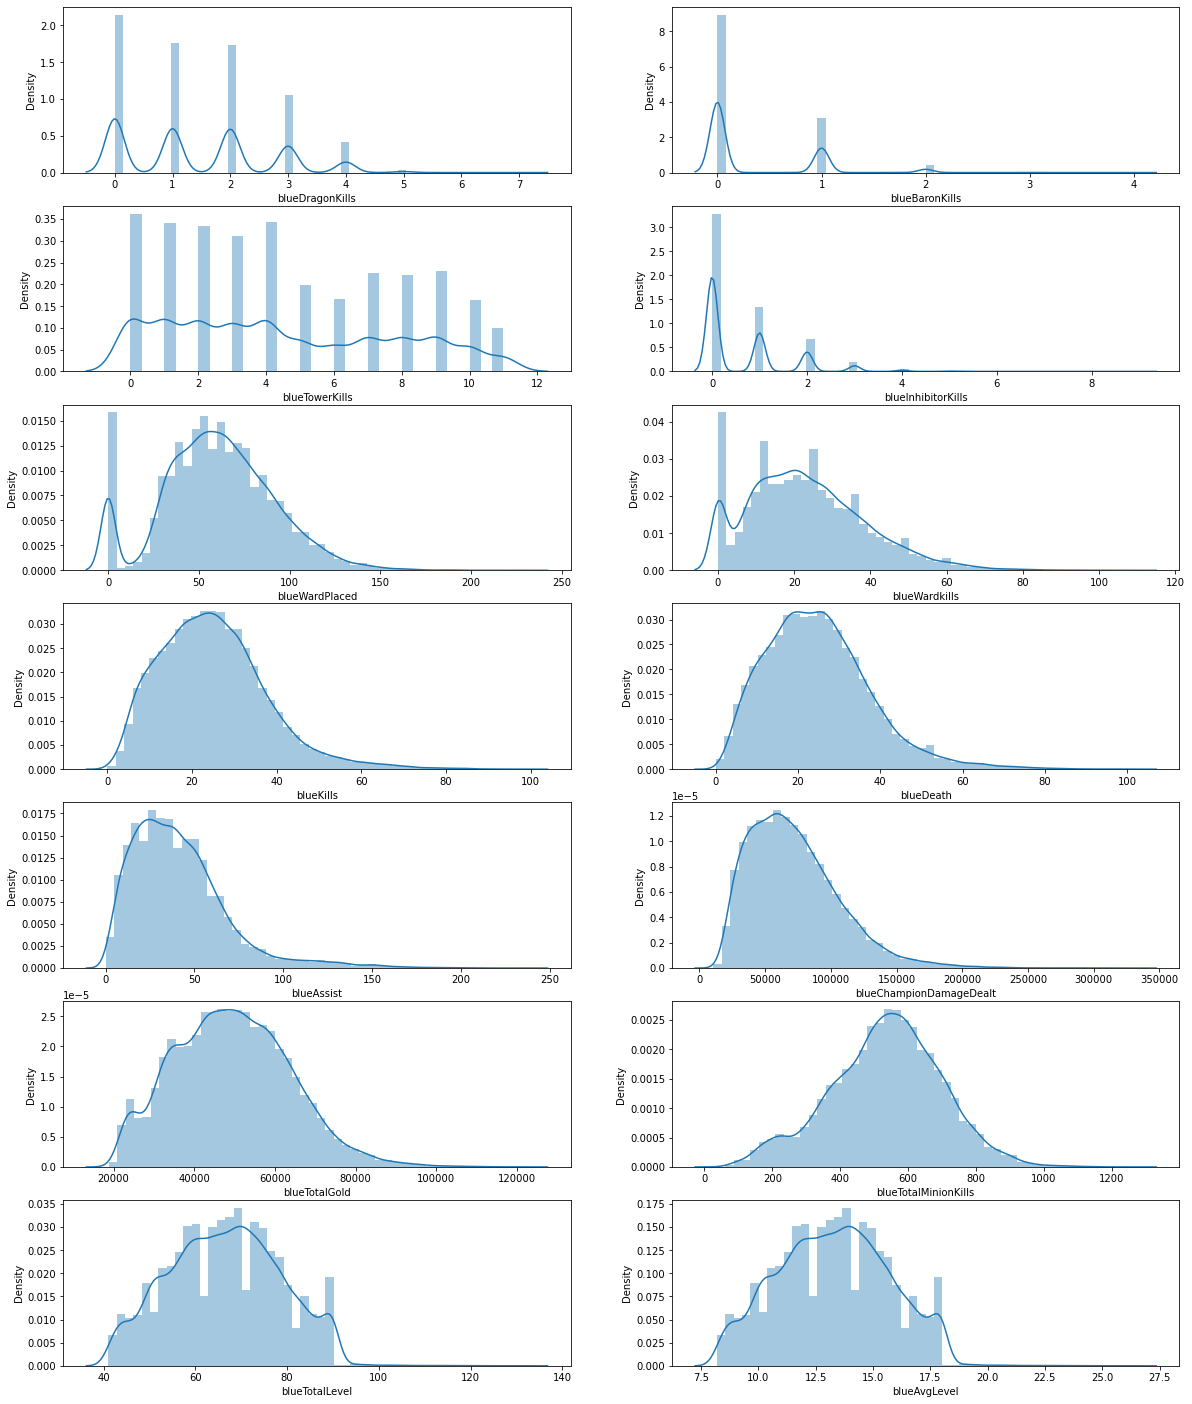

In [9]:
# 레벨이 40이하인 게임은 제거한 다음 칼럼별 분포 확인
col = ['blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel']

row_index = [0,0,1,1,2,2,3,3,4,4,5,5,6,6]
col_index =  [0,1,0,1,0,1,0,1,0,1,0,1,0,1] 

fig, axs = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 25))

for col, r, c in zip(col, row_index, col_index): 
    sns.distplot(lol_chl[col], kde = True,  ax = axs[r][c])

## 블루팀이 와드를 설치한 개수가 10개 미만인 게임을 제거합니다.

<AxesSubplot:xlabel='blueWardPlaced', ylabel='Density'>

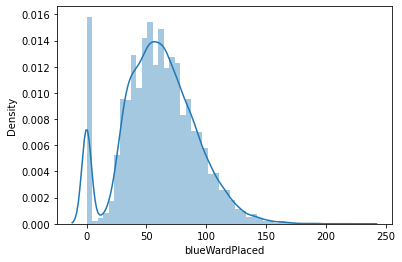

In [10]:
# 블루팀이 와드를 설치한 개수당 게임 판 수를 시각화합니다.
sns.distplot(lol_chl['blueWardPlaced'])

In [11]:
# 인덱스가 한 게임에서 와드를 설치한 개수
# 값이 와드 설치 개수당 게임 판 수
# 블루팀의 와드 설치 개수를 파악해봅니다.

lol_chl['blueWardPlaced'].value_counts().sort_index()[:30]

0     1867
1        1
2        1
3        1
4        2
5        4
6        3
7        4
8        8
9       10
10      12
11      16
12      10
13      15
14      19
15      16
16      15
17      25
18      24
19      29
20      56
21      65
22      60
23      80
24     109
25     131
26     128
27     172
28     162
29     203
Name: blueWardPlaced, dtype: int64

In [12]:
# 블루팀이 와드를 설치한 개수가 10개 미만인 게임을 제거해줍니다.
lol_chl = lol_chl[lol_chl['blueWardPlaced'] > 10]
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,28,45732,37657,490,57,11.4,89,4,17334,16396
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675


In [13]:
# FE를 확인합니다.
lol_chl['blueWardPlaced'].value_counts().sort_index()[:10]

11    16
12    10
13    15
14    19
15    16
16    15
17    25
18    24
19    29
20    56
Name: blueWardPlaced, dtype: int64

## 레드팀이 와드를 설치한 개수가 10개 미만인 게임을 제거합니다.

In [14]:
# FE를 확인합니다.
lol_chl = lol_chl[lol_chl['redWardPlaced'] > 10]
lol_chl['redWardPlaced'].value_counts().sort_index()[:10]

11     5
12    10
13    15
14     9
15     7
16    23
17    18
18    16
19    24
20    42
Name: redWardPlaced, dtype: int64

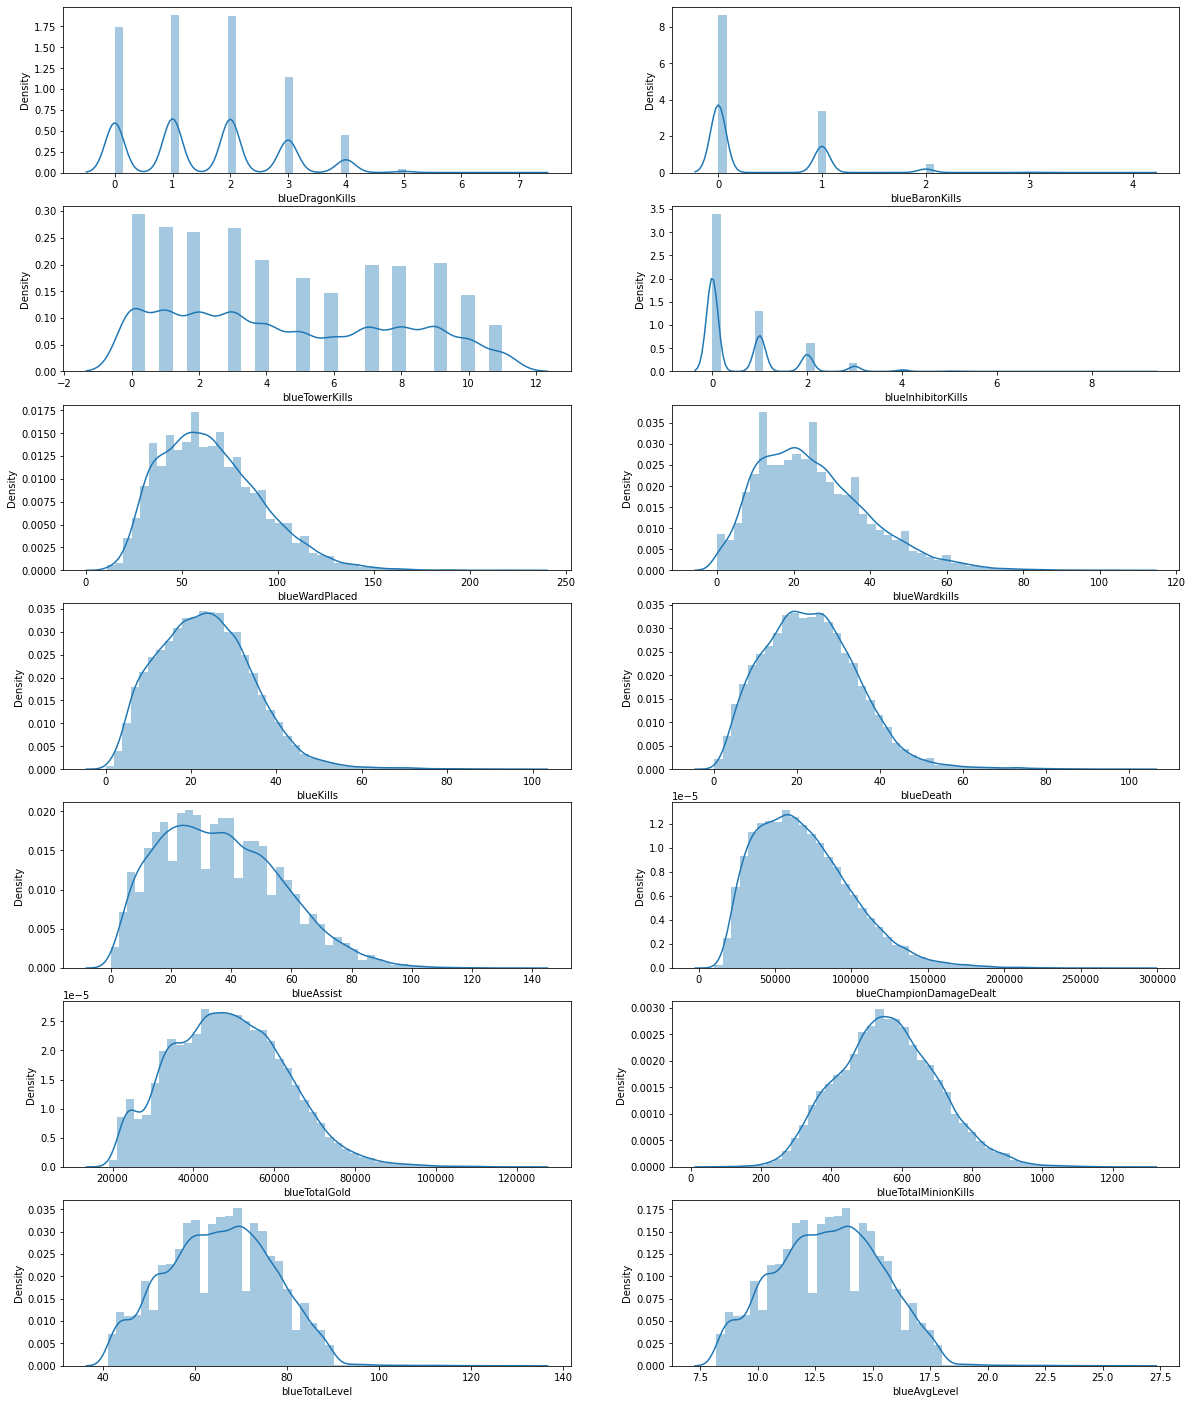

In [15]:
# 와드를 설치한 개수가 10개 미만인 게임을 제거하고 칼럼별 분포 확인
col = ['blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel']

row_index = [0,0,1,1,2,2,3,3,4,4,5,5,6,6]
col_index =  [0,1,0,1,0,1,0,1,0,1,0,1,0,1] 

fig, axs = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 25))

for col, r, c in zip(col, row_index, col_index): 
    sns.distplot(lol_chl[col], kde = True,  ax = axs[r][c])

## 경기시간이 15분 미만인 데이터는 삭제합니다.

<AxesSubplot:xlabel='gameDuraton', ylabel='Density'>

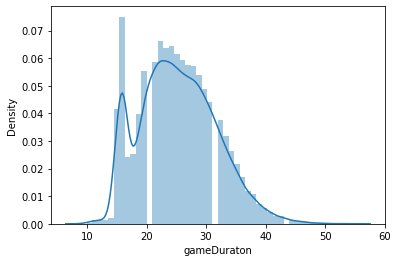

In [16]:
# 경기시간 칼럼의 분포를 확인합니다.
sns.distplot(round(lol_chl['gameDuraton']/60), kde = True)

In [17]:
# 경기시간이 15분 미만인 데이터는 삭제합니다.
lol_chl = lol_chl[round(lol_chl['gameDuraton']/60) >= 15]
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,28,45732,37657,490,57,11.4,89,4,17334,16396
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675


<AxesSubplot:xlabel='gameDuraton', ylabel='Density'>

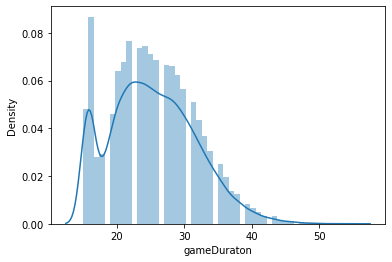

In [18]:
# 경기시간이 15분 미만인 데이터는 삭제후 데이터의 분포를 확인합니다.
sns.distplot(round(lol_chl['gameDuraton']/60), kde = True)

In [19]:
print(lol_chl.columns[:25].shape)
lol_chl.columns[:25]

(25,)


Index(['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt'],
      dtype='object')

## 이상치 제거 후 컬럼별 분포 확인

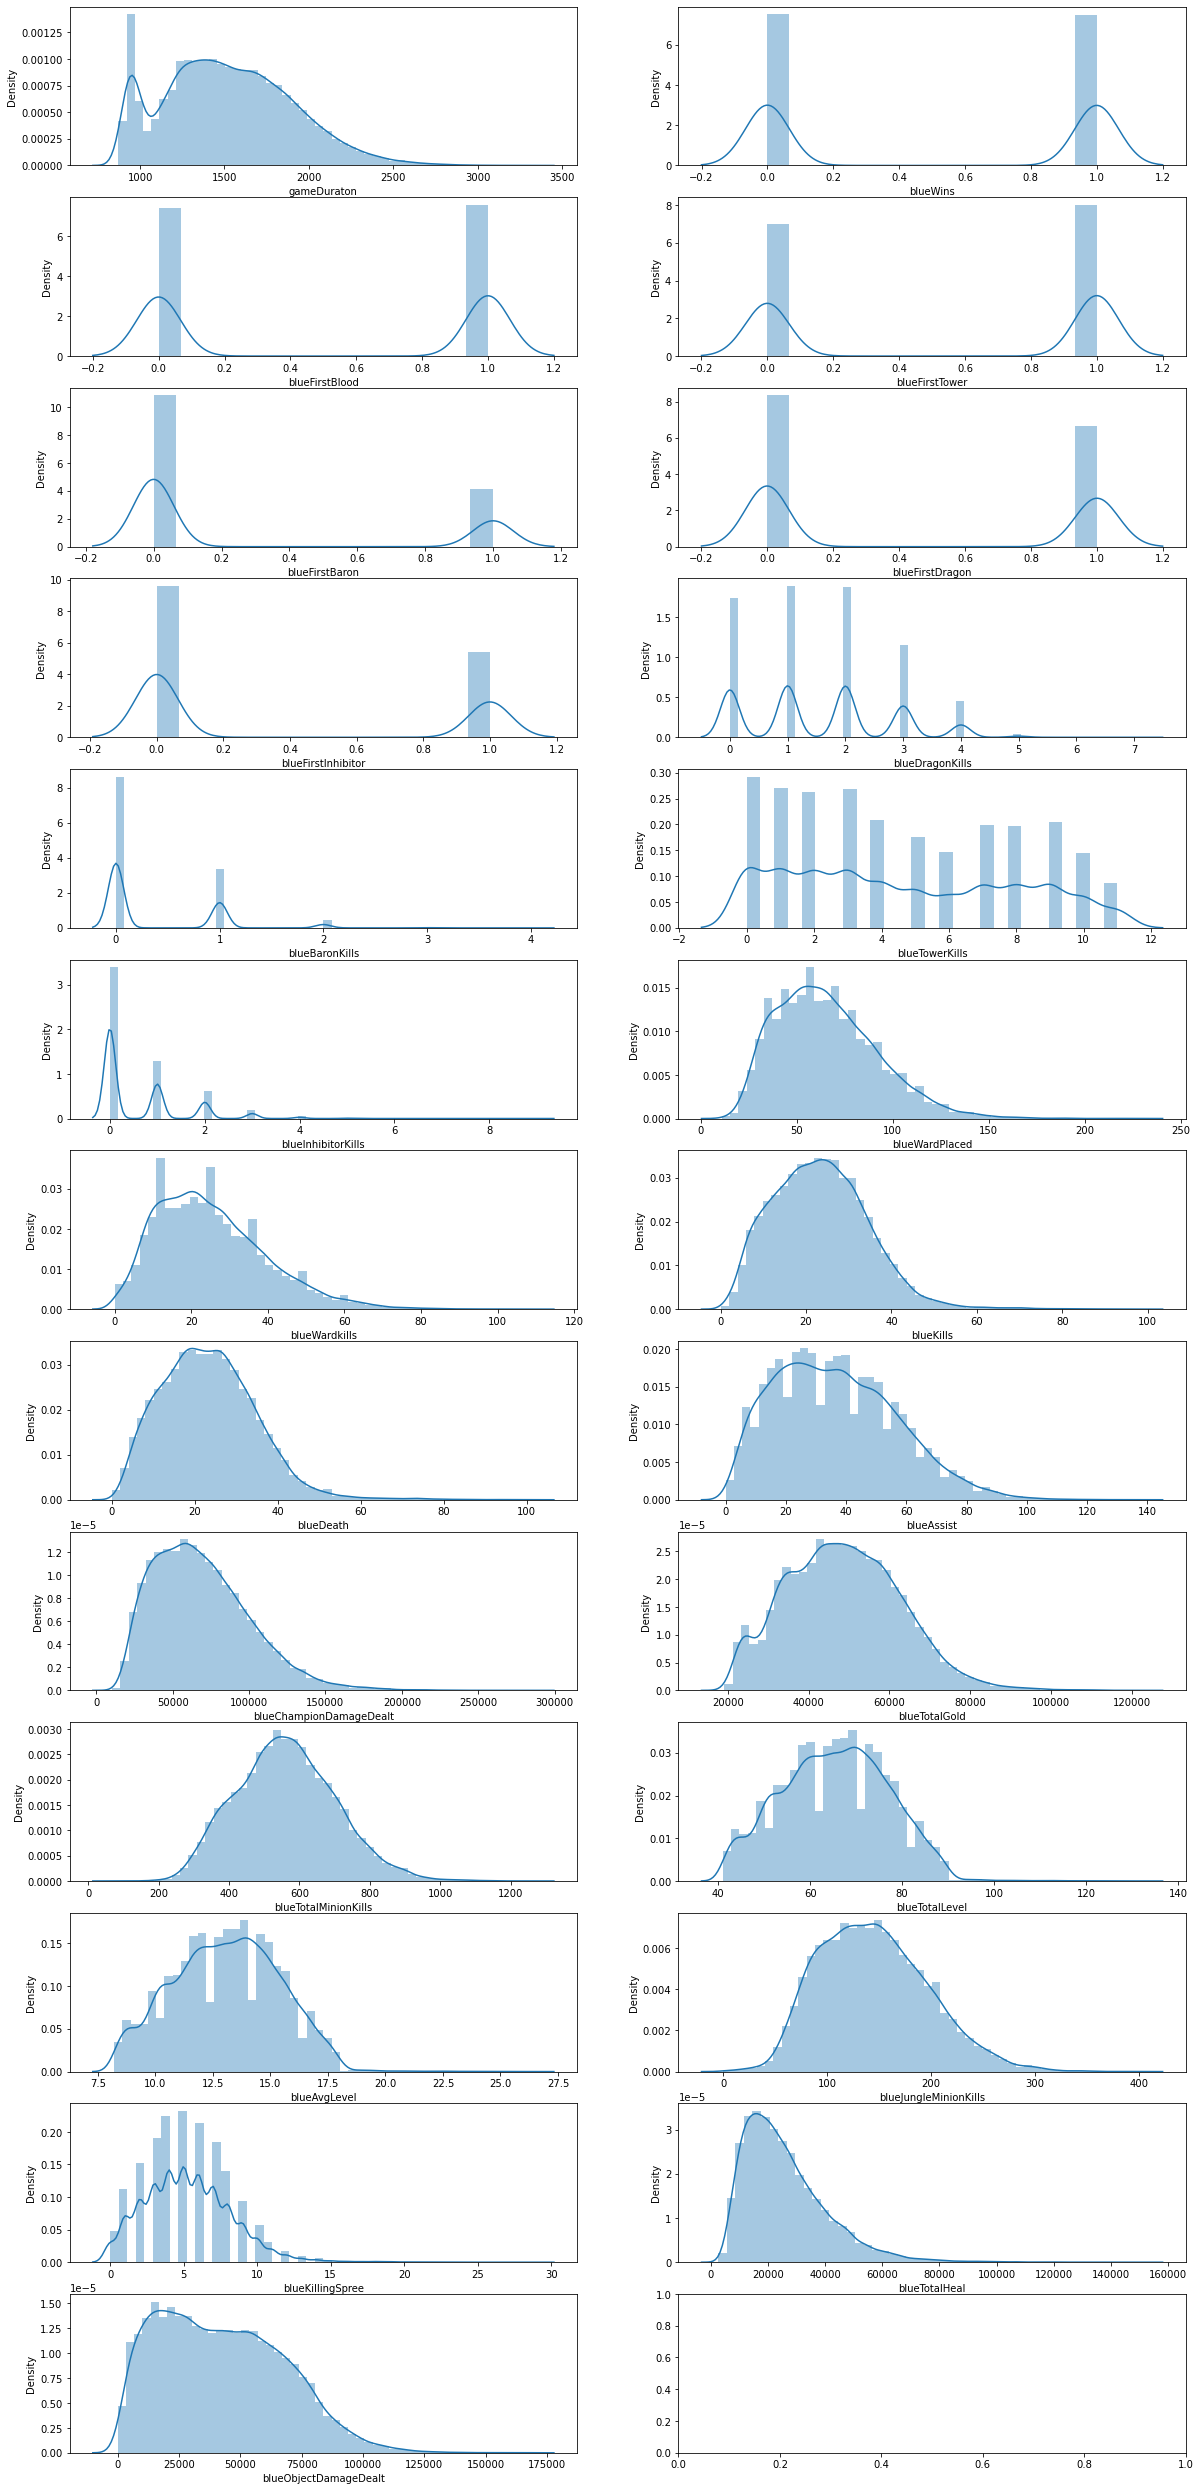

In [20]:
col = ['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt']

row_index = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13]
col_index =  [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1] 

fig, axs = plt.subplots(nrows = 13, ncols = 2, figsize = (20, 45))

for col, r, c in zip(col, row_index, col_index): 
    sns.distplot(lol_chl[col], kde = True,  ax = axs[r][c])

# 이상치 및 gameId 칼럼 제거 함수화

In [3]:
def lol_del_outlier(lol_data):
    
    # gameId 칼럼을 제거해 줍니다.
    lol_data = lol_data.drop("gameId", axis=1)
    
    # 블루팀총합 레벨이 40이하인 게임은 제거해서 lol_chl에 담아줍니다.
    lol_data = lol_data[lol_data["blueTotalLevel"] > 40]
    
    # 레드팀총합 레벨이 40이하인 게임은 제거해서 lol_chl에 담아줍니다.
    lol_data = lol_data[lol_data["redTotalLevel"] > 40]

    # 블루팀이 와드를 설치한 개수가 10개 미만인 게임을 제거해줍니다.
    lol_data = lol_data[lol_data['blueWardPlaced'] > 10]

    # 레드팀이 와드를 설치한 개수가 10개 미만인 게임을 제거해줍니다.
    lol_data = lol_data[lol_data['redWardPlaced'] > 10]
    
    # 경기시간이 15분 미만인 데이터는 삭제합니다.
    lol_data = lol_data[round(lol_data['gameDuraton']/60) >= 15]

    return lol_data

# 결측치 제거(FE)

In [23]:
# 모든 데이터셋에 결측치가 없음을 확인합니다.
lol_chl.isnull().sum().sum()

0

# 스케일링(FE)

In [4]:
lol_chl = lol_del_outlier(lol_chl)
lol_chl

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,0,0,0,1,0,2,0,4,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,0,0,0,1,1,0,1,1,2,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,1,1,1,1,1,1,2,2,11,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,1,0,1,1,1,1,3,1,7,...,28,45732,37657,490,57,11.4,89,4,17334,16396
26899,1468,0,1,0,0,0,0,1,0,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,970,0,1,1,0,1,0,3,0,5,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,1480,0,1,1,0,1,0,1,0,4,...,34,55214,48849,636,66,13.2,175,6,25448,27675


In [15]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
# 사이킷런 fit()에는 ndarray뿐만 아니라 판다스 데이터프레임모 들어올 수 있다.
scaler.fit(lol_chl)
lol_chl_scaled = scaler.transform(lol_chl)

In [17]:
#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
lol_chl_scaled = pd.DataFrame(data=lol_chl_scaled, columns=lol_chl.columns)
lol_chl_scaled

,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,-0.519609,-0.998182,0.989686,-1.070658,-0.619930,-0.893542,-0.750215,-1.265424,-0.623761,-1.382756,...,1.565108,0.125667,0.075135,-0.250636,-0.143177,-0.143177,-0.148430,0.907510,0.818903,0.738112
1,-0.535424,1.001821,-1.010421,-1.070658,-0.619930,1.119142,-0.750215,0.361614,-0.623761,-0.191202,...,-1.412800,-0.782809,-0.817202,0.015579,-0.573168,-0.573168,-0.225359,-0.765542,-0.106886,-1.068535
2,-1.550224,-0.998182,-1.010421,-1.070658,-0.619930,-0.893542,-0.750215,-1.265424,-0.623761,-1.382756,...,-0.817219,-1.206195,-0.941747,-1.182389,-1.347154,-1.347154,-1.090807,-0.096321,-0.923171,0.143327
3,1.523172,-0.998182,-1.010421,-1.070658,1.613085,1.119142,-0.750215,-0.451905,1.162203,-0.786979,...,1.763636,1.792900,1.529753,1.844056,1.576791,1.576791,1.140126,1.242120,2.592921,1.819147
4,2.171590,1.001821,0.989686,0.934005,1.613085,1.119142,1.332951,0.361614,2.948168,1.894018,...,2.309585,1.971769,1.815672,1.577841,1.662789,1.662789,1.563234,0.572900,4.001345,0.881450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23628,-0.632950,1.001821,-1.010421,0.934005,1.613085,1.119142,1.332951,1.175133,1.162203,0.702464,...,-0.420164,-0.735048,-0.780584,-0.551880,-0.745165,-0.745165,-1.090807,-0.430931,-0.606727,-0.979251
23629,-0.137411,-0.998182,0.989686,-1.070658,-0.619930,-0.893542,-0.750215,-0.451905,-0.623761,-1.382756,...,0.175418,0.205006,-0.154978,-0.635947,-0.143177,-0.143177,-0.090734,0.238289,1.478132,0.047145
23630,-1.450062,-0.998182,0.989686,0.934005,-0.619930,1.119142,-0.750215,1.175133,-0.623761,0.106687,...,-0.271269,0.971776,1.505083,-0.797078,0.544810,0.544810,-0.186895,1.911341,-0.707896,0.338809
23631,-0.105781,-0.998182,0.989686,0.934005,-0.619930,1.119142,-0.750215,-0.451905,-0.623761,-0.191202,...,-0.122373,-0.435924,0.006045,0.470947,0.028820,0.028820,0.563160,0.238289,-0.065605,-0.539690


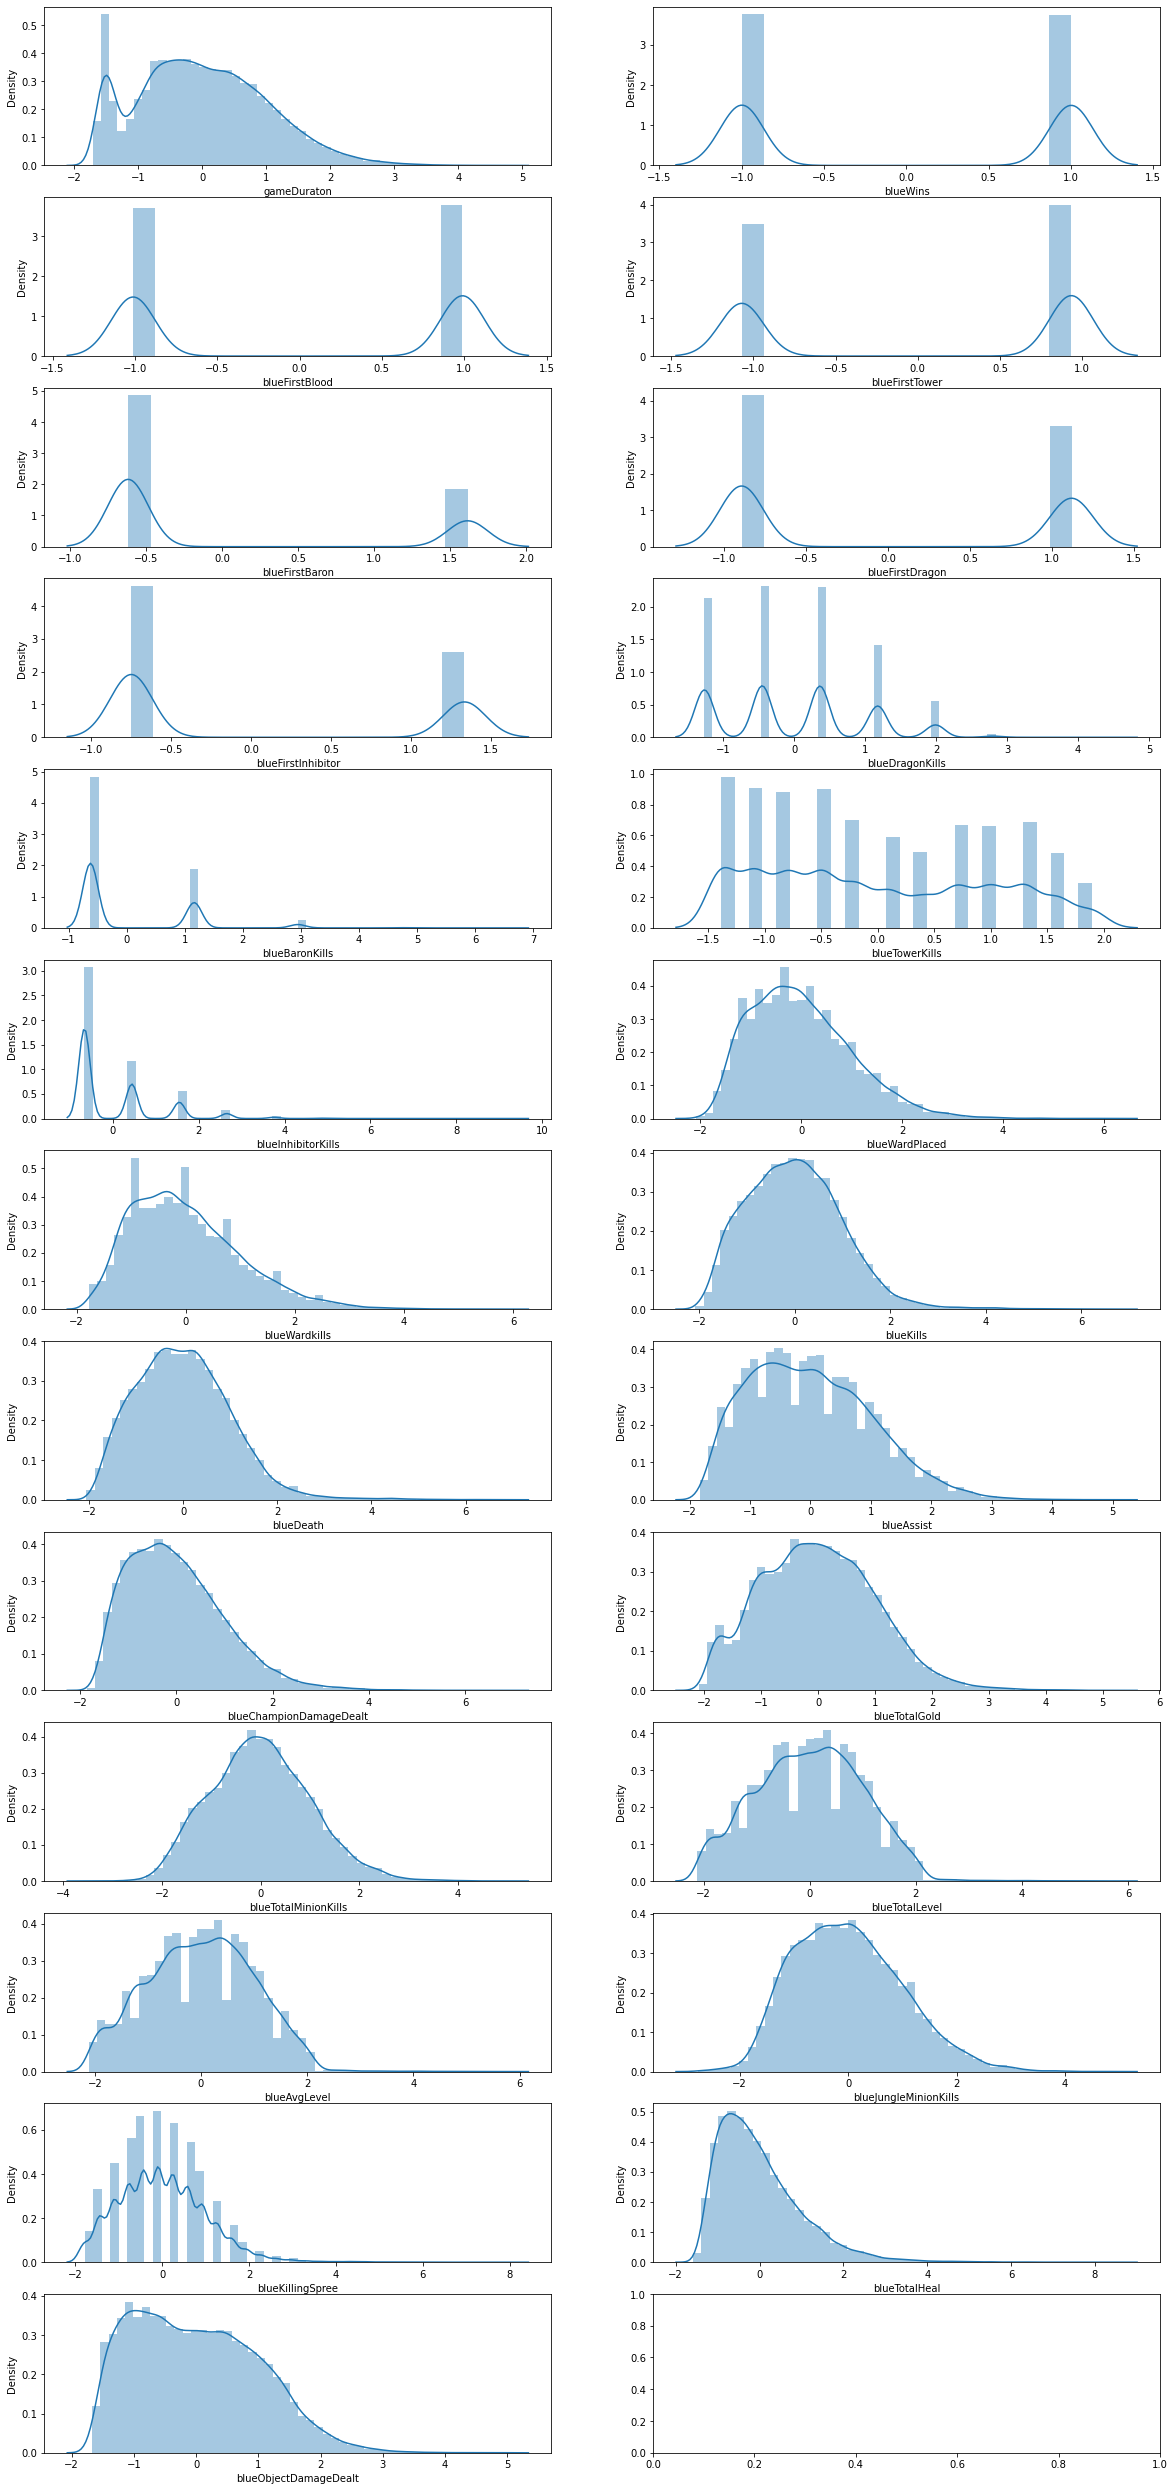

In [19]:
col = ['gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt']

row_index = [0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,11,11,12,12,13,13]
col_index =  [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1] 

fig, axs = plt.subplots(nrows = 13, ncols = 2, figsize = (20, 45))

for col, r, c in zip(col, row_index, col_index): 
    sns.distplot(lol_chl_scaled[col], kde = True,  ax = axs[r][c])

# 랜덤포레스트 적용

## 분류 평가 지표 함수 생성

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 분류 평가 지표 함수 생성

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차 행렬')
    print(confusion)
    
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))

## lol_chl를  피쳐와 타켓 데이터로 나눕니다.
* 블루팀 데이터를 활용합니다.

In [25]:
# X_features는 blueWins을 제외한 블루팀 칼럼입니다.
# y_lables는 blueWins 칼럽입니다.  
X_features = pd.concat([lol_chl.iloc[:, :1], lol_chl.iloc[:, 2:25]], axis = 1)
y_lables = pd.DataFrame(lol_chl.iloc[:, 1])

In [26]:
# 피쳐데이터의 결측치 확인
print(X_features.isnull().sum().sum())
X_features

0


,gameDuraton,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,1323,1,0,0,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,1317,0,0,0,1,0,2,0,4,0,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,932,0,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
3,2098,0,0,1,1,0,1,1,2,0,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4,2344,1,1,1,1,1,2,2,11,3,...,47,134826,74955,831,83,16.6,252,5,37161,95287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26898,1280,0,1,1,1,1,3,1,7,1,...,31,61984,51215,577,67,13.4,149,9,23564,57020
26899,1468,1,0,0,0,0,1,0,0,0,...,50,99418,41437,438,60,12.0,106,8,20122,13309
26900,970,1,1,0,1,0,3,0,5,1,...,36,61816,61221,346,65,13.0,28,5,32837,44640
26901,1480,1,1,0,1,0,1,0,4,0,...,19,51604,45013,568,63,12.6,132,4,18131,45242


In [27]:
# 타겟 데이터의 결측치 확인
print(y_lables.isnull().sum())
y_lables 

blueWins    0
dtype: int64


,blueWins
0,0
1,1
2,0
3,0
4,1
...,...
26898,1
26899,0
26900,0
26901,0


## train, test 데이터 셋으로 분리합니다.

In [28]:
# train, test 데이터 셋으로 분리합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables,
                                                   test_size = 0.2, random_state = 0)
print("train 데이터 셋의 행 개수 :", y_train.count())
print("test 데이터 셋의 행 개수 : ", y_test.count())

train 데이터 셋의 행 개수 : blueWins    18906
dtype: int64
test 데이터 셋의 행 개수 :  blueWins    4727
dtype: int64


## GridSearchCV로 하이퍼 파라미터 튜닝

In [29]:
# GridSearchCV로 하이퍼 파라미터 튜닝을 실시합니다.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100],
         'max_depth' : [6,8,10,12],
         'min_samples_leaf' : [8,12,18],
         'min_samples_split' : [8, 16, 20]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

# 최적 하이퍼 파리미터
print(grid_cv.best_params_)

# 최고 예측 정확도
print(grid_cv.best_score_)

{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.9712789590606157


In [30]:
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)

In [31]:
get_clf_eval(y_test, pred)

오차 행렬
[[2262   98]
 [  36 2331]]
정확도: 0.9717, 정밀도: 0.9597, 재현율: 0.9848,    F1: 0.9721


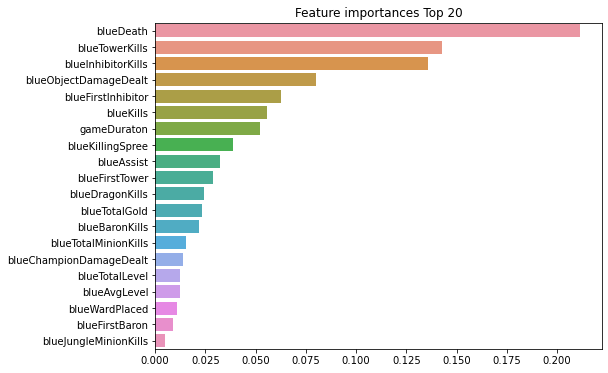

In [32]:
# feature_importances_에서 feature의 중요도를 확인합니다.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# FE 및 데이터 셋 분리(블루팀 기준) 함수화

In [33]:
def FE_split(lol_data):
    # FE함수 추가
    lol_data = lol_del_outlier(lol_data)
    
    # 데이터셋을 피쳐와 레이블로 분리합니다.
    # X_features는 blueWins을 제외한 블루팀 칼럼입니다.
    # y_lables는 blueWins 칼럽입니다.  
    X_features = pd.concat([lol_data.iloc[:, :1], lol_data.iloc[:, 2:25]], axis = 1)
    y_lables = pd.DataFrame(lol_data.iloc[:, 1])
    
    
    # train, test 데이터 셋으로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables,
                                                   test_size = 0.2, random_state = 0)

    return X_train, X_test, y_train, y_test

# XGBoost 전용 FE_split_xgboost함수 생성

In [149]:
# xgboost는 gameDuraton이 중요 피쳐로 나와서 gameDuraton을 빼주는 FE_split_xgboost을 만듭니다.
def FE_split_xgboost(lol_data):
    
    # FE함수 추가
    lol_data = lol_del_outlier(lol_data)
    
    # gameDuraton 칼럼을 제거해 줍니다.
    lol_data.drop("gameDuraton", axis=1, inplace = True)
    
    # 데이터셋을 피쳐와 레이블로 분리합니다.
    # X_features는 blueWins을 제외한 블루팀 칼럼입니다.
    # y_lables는 blueWins 칼럽입니다.  
    X_features = lol_data.iloc[:, 1:24]
    y_lables = pd.DataFrame(lol_data['blueWins'])
    
    # train, test 데이터 셋으로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_lables,
                                                   test_size = 0.2, random_state = 0)

    return X_train, X_test, y_train, y_test

# XGBoost 적용

In [151]:
# FE_split_xgboost로 전처리
X_train, X_test, y_train, y_test = FE_split_xgboost(lol_chl)

In [152]:
# 검증을 위해 train데이터를 tr과 val로 분리합니다.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3,
                                           random_state = 0)

In [153]:
from hyperopt import hp
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth' : hp.quniform('max_depth', 5, 15, 1), 
                   'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
                   'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 0.95),
                   'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)}

In [154]:
# cross_val_score()은 XGBoost에서 early_stopping이 적용이 안됨
# 그래서 KFold 방식을 써줌
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환. 
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']),
                           min_child_weight = int(search_space['min_child_weight']),
                           colsample_bytree = search_space['colsample_bytree'],
                           learning_rate = search_space['learning_rate'])
    
    # 3개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 roc_auc 지표를 담을 list 생성.
    roc_auc_list = []
    kf = KFold(n_splits = 3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        # eval_metric : 반복수행시 사용하는 비용 평가 지표 
        # eval_set : 평가를 수행하는 별도의 검증 데이터 세트
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
                   eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        # roc_auc_score(y_true, y_score)
        # y_true : 실제 클래스 값 array
        # y_score : predict_proba()의 반환 값array에서 Positive 칼럼의 예측 확률
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
        # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
        # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
        return -1*np.mean(roc_auc_list)
            

In [155]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn = objective_func,
           space = xgb_search_space,
           algo = tpe.suggest,
           max_evals = 50, # 최대 반복 횟수를 지정합니다.
           trials = trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.99125	validation_1-auc:0.98815                                                                  
[1]	validation_0-auc:0.99236	validation_1-auc:0.99004                                                                  
[2]	validation_0-auc:0.99491	validation_1-auc:0.99333                                                                  
[3]	validation_0-auc:0.99556	validation_1-auc:0.99404                                                                  
[4]	validation_0-auc:0.99645	validation_1-auc:0.99464                                                                  
[5]	validation_0-auc:0.99667	validation_1-auc:0.99464                                                                  
[6]	validation_0-auc:0.99688	validation_1-auc:0.99495                                                                  
[7]	validation_0-auc:0.99718	validation_1-auc:0.99523                                                                  
[8]	validation_0-auc:0.99722	validation_

[36]	validation_0-auc:0.99905	validation_1-auc:0.99628                                                                 
[37]	validation_0-auc:0.99908	validation_1-auc:0.99625                                                                 
[38]	validation_0-auc:0.99910	validation_1-auc:0.99622                                                                 
[39]	validation_0-auc:0.99913	validation_1-auc:0.99628                                                                 
[40]	validation_0-auc:0.99915	validation_1-auc:0.99632                                                                 
[41]	validation_0-auc:0.99918	validation_1-auc:0.99636                                                                 
[42]	validation_0-auc:0.99920	validation_1-auc:0.99635                                                                 
[43]	validation_0-auc:0.99921	validation_1-auc:0.99631                                                                 
[44]	validation_0-auc:0.99923	validation

[72]	validation_0-auc:1.00000	validation_1-auc:0.99708                                                                 
[73]	validation_0-auc:1.00000	validation_1-auc:0.99706                                                                 
[74]	validation_0-auc:1.00000	validation_1-auc:0.99707                                                                 
[75]	validation_0-auc:1.00000	validation_1-auc:0.99707                                                                 
[76]	validation_0-auc:1.00000	validation_1-auc:0.99708                                                                 
[77]	validation_0-auc:1.00000	validation_1-auc:0.99708                                                                 
[78]	validation_0-auc:1.00000	validation_1-auc:0.99709                                                                 
[79]	validation_0-auc:1.00000	validation_1-auc:0.99709                                                                 
[80]	validation_0-auc:1.00000	validation

[8]	validation_0-auc:0.99922	validation_1-auc:0.99599                                                                  
[9]	validation_0-auc:0.99929	validation_1-auc:0.99604                                                                  
[10]	validation_0-auc:0.99936	validation_1-auc:0.99604                                                                 
[11]	validation_0-auc:0.99940	validation_1-auc:0.99605                                                                 
[12]	validation_0-auc:0.99947	validation_1-auc:0.99623                                                                 
[13]	validation_0-auc:0.99960	validation_1-auc:0.99622                                                                 
[14]	validation_0-auc:0.99963	validation_1-auc:0.99627                                                                 
[15]	validation_0-auc:0.99967	validation_1-auc:0.99629                                                                 
[16]	validation_0-auc:0.99970	validation

[44]	validation_0-auc:0.99928	validation_1-auc:0.99694                                                                 
[45]	validation_0-auc:0.99929	validation_1-auc:0.99695                                                                 
[46]	validation_0-auc:0.99931	validation_1-auc:0.99696                                                                 
[47]	validation_0-auc:0.99933	validation_1-auc:0.99695                                                                 
[48]	validation_0-auc:0.99934	validation_1-auc:0.99698                                                                 
[49]	validation_0-auc:0.99935	validation_1-auc:0.99699                                                                 
[50]	validation_0-auc:0.99937	validation_1-auc:0.99699                                                                 
[51]	validation_0-auc:0.99939	validation_1-auc:0.99698                                                                 
[52]	validation_0-auc:0.99940	validation

[80]	validation_0-auc:0.99988	validation_1-auc:0.99713                                                                 
[81]	validation_0-auc:0.99988	validation_1-auc:0.99714                                                                 
[82]	validation_0-auc:0.99989	validation_1-auc:0.99715                                                                 
[83]	validation_0-auc:0.99989	validation_1-auc:0.99714                                                                 
[84]	validation_0-auc:0.99989	validation_1-auc:0.99714                                                                 
[85]	validation_0-auc:0.99990	validation_1-auc:0.99714                                                                 
[86]	validation_0-auc:0.99990	validation_1-auc:0.99713                                                                 
[87]	validation_0-auc:0.99990	validation_1-auc:0.99713                                                                 
[88]	validation_0-auc:0.99991	validation

[16]	validation_0-auc:0.99824	validation_1-auc:0.99634                                                                 
[17]	validation_0-auc:0.99829	validation_1-auc:0.99636                                                                 
[18]	validation_0-auc:0.99835	validation_1-auc:0.99642                                                                 
[19]	validation_0-auc:0.99837	validation_1-auc:0.99642                                                                 
[20]	validation_0-auc:0.99847	validation_1-auc:0.99655                                                                 
[21]	validation_0-auc:0.99854	validation_1-auc:0.99657                                                                 
[22]	validation_0-auc:0.99861	validation_1-auc:0.99665                                                                 
[23]	validation_0-auc:0.99867	validation_1-auc:0.99668                                                                 
[24]	validation_0-auc:0.99870	validation

[54]	validation_0-auc:0.99999	validation_1-auc:0.99690                                                                 
[55]	validation_0-auc:1.00000	validation_1-auc:0.99691                                                                 
[56]	validation_0-auc:1.00000	validation_1-auc:0.99694                                                                 
[57]	validation_0-auc:1.00000	validation_1-auc:0.99694                                                                 
[58]	validation_0-auc:1.00000	validation_1-auc:0.99695                                                                 
[59]	validation_0-auc:1.00000	validation_1-auc:0.99696                                                                 
[60]	validation_0-auc:1.00000	validation_1-auc:0.99694                                                                 
[61]	validation_0-auc:1.00000	validation_1-auc:0.99694                                                                 
[62]	validation_0-auc:1.00000	validation

[90]	validation_0-auc:0.99973	validation_1-auc:0.99638                                                                 
[91]	validation_0-auc:0.99974	validation_1-auc:0.99640                                                                 
[92]	validation_0-auc:0.99974	validation_1-auc:0.99639                                                                 
[93]	validation_0-auc:0.99975	validation_1-auc:0.99638                                                                 
[94]	validation_0-auc:0.99975	validation_1-auc:0.99638                                                                 
[95]	validation_0-auc:0.99976	validation_1-auc:0.99639                                                                 
[96]	validation_0-auc:0.99976	validation_1-auc:0.99640                                                                 
[97]	validation_0-auc:0.99977	validation_1-auc:0.99640                                                                 
[98]	validation_0-auc:0.99977	validation

[26]	validation_0-auc:0.99833	validation_1-auc:0.99602                                                                 
[27]	validation_0-auc:0.99836	validation_1-auc:0.99603                                                                 
[28]	validation_0-auc:0.99840	validation_1-auc:0.99606                                                                 
[29]	validation_0-auc:0.99840	validation_1-auc:0.99608                                                                 
[30]	validation_0-auc:0.99840	validation_1-auc:0.99606                                                                 
[31]	validation_0-auc:0.99843	validation_1-auc:0.99610                                                                 
[32]	validation_0-auc:0.99849	validation_1-auc:0.99605                                                                 
[33]	validation_0-auc:0.99851	validation_1-auc:0.99604                                                                 
[34]	validation_0-auc:0.99852	validation

[62]	validation_0-auc:0.99975	validation_1-auc:0.99651                                                                 
[63]	validation_0-auc:0.99976	validation_1-auc:0.99652                                                                 
[64]	validation_0-auc:0.99976	validation_1-auc:0.99653                                                                 
[65]	validation_0-auc:0.99977	validation_1-auc:0.99654                                                                 
[66]	validation_0-auc:0.99978	validation_1-auc:0.99656                                                                 
[67]	validation_0-auc:0.99978	validation_1-auc:0.99656                                                                 
[68]	validation_0-auc:0.99979	validation_1-auc:0.99656                                                                 
[69]	validation_0-auc:0.99979	validation_1-auc:0.99658                                                                 
[70]	validation_0-auc:0.99980	validation

[98]	validation_0-auc:0.99933	validation_1-auc:0.99721                                                                 
[99]	validation_0-auc:0.99935	validation_1-auc:0.99721                                                                 
[0]	validation_0-auc:0.97947	validation_1-auc:0.96559                                                                  
[1]	validation_0-auc:0.98651	validation_1-auc:0.97403                                                                  
[2]	validation_0-auc:0.99577	validation_1-auc:0.98940                                                                  
[3]	validation_0-auc:0.99730	validation_1-auc:0.99250                                                                  
[4]	validation_0-auc:0.99804	validation_1-auc:0.99399                                                                  
[5]	validation_0-auc:0.99834	validation_1-auc:0.99477                                                                  
[6]	validation_0-auc:0.99842	validation_

[36]	validation_0-auc:0.99892	validation_1-auc:0.99658                                                                 
[37]	validation_0-auc:0.99896	validation_1-auc:0.99661                                                                 
[38]	validation_0-auc:0.99897	validation_1-auc:0.99661                                                                 
[39]	validation_0-auc:0.99898	validation_1-auc:0.99661                                                                 
[40]	validation_0-auc:0.99899	validation_1-auc:0.99662                                                                 
[41]	validation_0-auc:0.99901	validation_1-auc:0.99665                                                                 
[42]	validation_0-auc:0.99902	validation_1-auc:0.99664                                                                 
[43]	validation_0-auc:0.99904	validation_1-auc:0.99665                                                                 
[44]	validation_0-auc:0.99907	validation

[72]	validation_0-auc:1.00000	validation_1-auc:0.99680                                                                 
[73]	validation_0-auc:1.00000	validation_1-auc:0.99681                                                                 
[74]	validation_0-auc:1.00000	validation_1-auc:0.99682                                                                 
[75]	validation_0-auc:1.00000	validation_1-auc:0.99683                                                                 
[76]	validation_0-auc:1.00000	validation_1-auc:0.99684                                                                 
[77]	validation_0-auc:1.00000	validation_1-auc:0.99686                                                                 
[78]	validation_0-auc:1.00000	validation_1-auc:0.99687                                                                 
[79]	validation_0-auc:1.00000	validation_1-auc:0.99688                                                                 
[80]	validation_0-auc:1.00000	validation

[8]	validation_0-auc:0.99755	validation_1-auc:0.99561                                                                  
[9]	validation_0-auc:0.99762	validation_1-auc:0.99576                                                                  
[10]	validation_0-auc:0.99776	validation_1-auc:0.99589                                                                 
[11]	validation_0-auc:0.99782	validation_1-auc:0.99588                                                                 
[12]	validation_0-auc:0.99792	validation_1-auc:0.99601                                                                 
[13]	validation_0-auc:0.99808	validation_1-auc:0.99611                                                                 
[14]	validation_0-auc:0.99816	validation_1-auc:0.99618                                                                 
[15]	validation_0-auc:0.99823	validation_1-auc:0.99626                                                                 
[16]	validation_0-auc:0.99825	validation

[44]	validation_0-auc:0.99913	validation_1-auc:0.99714                                                                 
[45]	validation_0-auc:0.99916	validation_1-auc:0.99712                                                                 
[46]	validation_0-auc:0.99920	validation_1-auc:0.99713                                                                 
[47]	validation_0-auc:0.99921	validation_1-auc:0.99713                                                                 
[48]	validation_0-auc:0.99923	validation_1-auc:0.99714                                                                 
[49]	validation_0-auc:0.99926	validation_1-auc:0.99712                                                                 
[50]	validation_0-auc:0.99927	validation_1-auc:0.99711                                                                 
[51]	validation_0-auc:0.99929	validation_1-auc:0.99713                                                                 
[52]	validation_0-auc:0.99930	validation

[21]	validation_0-auc:0.99953	validation_1-auc:0.99653                                                                 
[22]	validation_0-auc:0.99958	validation_1-auc:0.99651                                                                 
[23]	validation_0-auc:0.99959	validation_1-auc:0.99657                                                                 
[24]	validation_0-auc:0.99960	validation_1-auc:0.99661                                                                 
[25]	validation_0-auc:0.99962	validation_1-auc:0.99668                                                                 
[26]	validation_0-auc:0.99964	validation_1-auc:0.99672                                                                 
[27]	validation_0-auc:0.99967	validation_1-auc:0.99676                                                                 
[28]	validation_0-auc:0.99968	validation_1-auc:0.99680                                                                 
[29]	validation_0-auc:0.99969	validation

[57]	validation_0-auc:0.99927	validation_1-auc:0.99710                                                                 
[58]	validation_0-auc:0.99929	validation_1-auc:0.99711                                                                 
[59]	validation_0-auc:0.99931	validation_1-auc:0.99713                                                                 
[60]	validation_0-auc:0.99932	validation_1-auc:0.99714                                                                 
[61]	validation_0-auc:0.99932	validation_1-auc:0.99715                                                                 
[62]	validation_0-auc:0.99934	validation_1-auc:0.99716                                                                 
[63]	validation_0-auc:0.99936	validation_1-auc:0.99715                                                                 
[64]	validation_0-auc:0.99938	validation_1-auc:0.99716                                                                 
[65]	validation_0-auc:0.99939	validation

[93]	validation_0-auc:0.99987	validation_1-auc:0.99706                                                                 
[94]	validation_0-auc:0.99987	validation_1-auc:0.99706                                                                 
[95]	validation_0-auc:0.99988	validation_1-auc:0.99707                                                                 
[96]	validation_0-auc:0.99988	validation_1-auc:0.99707                                                                 
[97]	validation_0-auc:0.99988	validation_1-auc:0.99706                                                                 
[98]	validation_0-auc:0.99989	validation_1-auc:0.99707                                                                 
[0]	validation_0-auc:0.99101	validation_1-auc:0.98820                                                                  
[1]	validation_0-auc:0.99304	validation_1-auc:0.99044                                                                  
[2]	validation_0-auc:0.99512	validation_

[47]	validation_0-auc:0.99938	validation_1-auc:0.99716                                                                 
[48]	validation_0-auc:0.99939	validation_1-auc:0.99716                                                                 
[49]	validation_0-auc:0.99940	validation_1-auc:0.99716                                                                 
[50]	validation_0-auc:0.99941	validation_1-auc:0.99715                                                                 
[51]	validation_0-auc:0.99943	validation_1-auc:0.99715                                                                 
[52]	validation_0-auc:0.99945	validation_1-auc:0.99716                                                                 
[53]	validation_0-auc:0.99947	validation_1-auc:0.99715                                                                 
[54]	validation_0-auc:0.99949	validation_1-auc:0.99715                                                                 
[55]	validation_0-auc:0.99951	validation

[38]	validation_0-auc:0.99749	validation_1-auc:0.99556                                                                 
[39]	validation_0-auc:0.99749	validation_1-auc:0.99556                                                                 
[40]	validation_0-auc:0.99750	validation_1-auc:0.99556                                                                 
[41]	validation_0-auc:0.99753	validation_1-auc:0.99559                                                                 
[42]	validation_0-auc:0.99753	validation_1-auc:0.99559                                                                 
[43]	validation_0-auc:0.99756	validation_1-auc:0.99561                                                                 
[44]	validation_0-auc:0.99755	validation_1-auc:0.99562                                                                 
[45]	validation_0-auc:0.99757	validation_1-auc:0.99563                                                                 
[46]	validation_0-auc:0.99759	validation

[74]	validation_0-auc:1.00000	validation_1-auc:0.99702                                                                 
[75]	validation_0-auc:1.00000	validation_1-auc:0.99702                                                                 
[76]	validation_0-auc:1.00000	validation_1-auc:0.99702                                                                 
[77]	validation_0-auc:1.00000	validation_1-auc:0.99703                                                                 
[78]	validation_0-auc:1.00000	validation_1-auc:0.99703                                                                 
[79]	validation_0-auc:1.00000	validation_1-auc:0.99703                                                                 
[80]	validation_0-auc:1.00000	validation_1-auc:0.99703                                                                 
[81]	validation_0-auc:1.00000	validation_1-auc:0.99704                                                                 
[82]	validation_0-auc:1.00000	validation

[10]	validation_0-auc:0.99781	validation_1-auc:0.99615                                                                 
[11]	validation_0-auc:0.99788	validation_1-auc:0.99620                                                                 
[12]	validation_0-auc:0.99802	validation_1-auc:0.99632                                                                 
[13]	validation_0-auc:0.99817	validation_1-auc:0.99633                                                                 
[14]	validation_0-auc:0.99823	validation_1-auc:0.99637                                                                 
[15]	validation_0-auc:0.99832	validation_1-auc:0.99640                                                                 
[16]	validation_0-auc:0.99840	validation_1-auc:0.99647                                                                 
[17]	validation_0-auc:0.99843	validation_1-auc:0.99651                                                                 
[18]	validation_0-auc:0.99847	validation

[58]	validation_0-auc:0.99810	validation_1-auc:0.99662                                                                 
[59]	validation_0-auc:0.99812	validation_1-auc:0.99662                                                                 
[60]	validation_0-auc:0.99814	validation_1-auc:0.99665                                                                 
[61]	validation_0-auc:0.99815	validation_1-auc:0.99665                                                                 
[62]	validation_0-auc:0.99817	validation_1-auc:0.99666                                                                 
[63]	validation_0-auc:0.99819	validation_1-auc:0.99668                                                                 
[64]	validation_0-auc:0.99820	validation_1-auc:0.99670                                                                 
[65]	validation_0-auc:0.99821	validation_1-auc:0.99671                                                                 
[66]	validation_0-auc:0.99822	validation

[20]	validation_0-auc:0.99857	validation_1-auc:0.99638                                                                 
[21]	validation_0-auc:0.99862	validation_1-auc:0.99643                                                                 
[22]	validation_0-auc:0.99867	validation_1-auc:0.99646                                                                 
[23]	validation_0-auc:0.99870	validation_1-auc:0.99646                                                                 
[24]	validation_0-auc:0.99872	validation_1-auc:0.99656                                                                 
[25]	validation_0-auc:0.99875	validation_1-auc:0.99661                                                                 
[26]	validation_0-auc:0.99878	validation_1-auc:0.99660                                                                 
[27]	validation_0-auc:0.99881	validation_1-auc:0.99662                                                                 
[28]	validation_0-auc:0.99883	validation

[56]	validation_0-auc:0.99905	validation_1-auc:0.99701                                                                 
[57]	validation_0-auc:0.99907	validation_1-auc:0.99704                                                                 
[58]	validation_0-auc:0.99910	validation_1-auc:0.99705                                                                 
[59]	validation_0-auc:0.99912	validation_1-auc:0.99707                                                                 
[60]	validation_0-auc:0.99913	validation_1-auc:0.99708                                                                 
[61]	validation_0-auc:0.99913	validation_1-auc:0.99709                                                                 
[62]	validation_0-auc:0.99916	validation_1-auc:0.99709                                                                 
[63]	validation_0-auc:0.99917	validation_1-auc:0.99708                                                                 
[64]	validation_0-auc:0.99919	validation

[92]	validation_0-auc:0.99988	validation_1-auc:0.99722                                                                 
[93]	validation_0-auc:0.99988	validation_1-auc:0.99721                                                                 
[94]	validation_0-auc:0.99988	validation_1-auc:0.99721                                                                 
[95]	validation_0-auc:0.99989	validation_1-auc:0.99721                                                                 
[96]	validation_0-auc:0.99989	validation_1-auc:0.99722                                                                 
[97]	validation_0-auc:0.99990	validation_1-auc:0.99722                                                                 
[98]	validation_0-auc:0.99990	validation_1-auc:0.99722                                                                 
[99]	validation_0-auc:0.99990	validation_1-auc:0.99720                                                                 
[0]	validation_0-auc:0.99209	validation_

[46]	validation_0-auc:0.99968	validation_1-auc:0.99699                                                                 
[47]	validation_0-auc:0.99969	validation_1-auc:0.99698                                                                 
[48]	validation_0-auc:0.99971	validation_1-auc:0.99698                                                                 
[49]	validation_0-auc:0.99973	validation_1-auc:0.99696                                                                 
[50]	validation_0-auc:0.99974	validation_1-auc:0.99697                                                                 
[51]	validation_0-auc:0.99975	validation_1-auc:0.99698                                                                 
[52]	validation_0-auc:0.99976	validation_1-auc:0.99695                                                                 
[53]	validation_0-auc:0.99978	validation_1-auc:0.99695                                                                 
[54]	validation_0-auc:0.99979	validation

[9]	validation_0-auc:0.99893	validation_1-auc:0.99625                                                                  
[10]	validation_0-auc:0.99898	validation_1-auc:0.99634                                                                 
[11]	validation_0-auc:0.99904	validation_1-auc:0.99636                                                                 
[12]	validation_0-auc:0.99913	validation_1-auc:0.99648                                                                 
[13]	validation_0-auc:0.99926	validation_1-auc:0.99651                                                                 
[14]	validation_0-auc:0.99933	validation_1-auc:0.99659                                                                 
[15]	validation_0-auc:0.99938	validation_1-auc:0.99659                                                                 
[16]	validation_0-auc:0.99941	validation_1-auc:0.99670                                                                 
[17]	validation_0-auc:0.99943	validation

[45]	validation_0-auc:0.99982	validation_1-auc:0.99673                                                                 
[46]	validation_0-auc:0.99984	validation_1-auc:0.99672                                                                 
[47]	validation_0-auc:0.99984	validation_1-auc:0.99673                                                                 
[48]	validation_0-auc:0.99985	validation_1-auc:0.99676                                                                 
[49]	validation_0-auc:0.99986	validation_1-auc:0.99676                                                                 
[50]	validation_0-auc:0.99988	validation_1-auc:0.99676                                                                 
[51]	validation_0-auc:0.99988	validation_1-auc:0.99679                                                                 
[52]	validation_0-auc:0.99989	validation_1-auc:0.99677                                                                 
[53]	validation_0-auc:0.99990	validation

[6]	validation_0-auc:0.99929	validation_1-auc:0.99545                                                                  
[7]	validation_0-auc:0.99942	validation_1-auc:0.99565                                                                  
[8]	validation_0-auc:0.99947	validation_1-auc:0.99564                                                                  
[9]	validation_0-auc:0.99948	validation_1-auc:0.99568                                                                  
[10]	validation_0-auc:0.99954	validation_1-auc:0.99571                                                                 
[11]	validation_0-auc:0.99960	validation_1-auc:0.99573                                                                 
[12]	validation_0-auc:0.99967	validation_1-auc:0.99577                                                                 
[13]	validation_0-auc:0.99974	validation_1-auc:0.99582                                                                 
[14]	validation_0-auc:0.99979	validation

[42]	validation_0-auc:0.99973	validation_1-auc:0.99704                                                                 
[43]	validation_0-auc:0.99975	validation_1-auc:0.99703                                                                 
[44]	validation_0-auc:0.99976	validation_1-auc:0.99705                                                                 
[45]	validation_0-auc:0.99977	validation_1-auc:0.99706                                                                 
[46]	validation_0-auc:0.99979	validation_1-auc:0.99704                                                                 
[47]	validation_0-auc:0.99980	validation_1-auc:0.99705                                                                 
[48]	validation_0-auc:0.99980	validation_1-auc:0.99707                                                                 
[49]	validation_0-auc:0.99982	validation_1-auc:0.99708                                                                 
[50]	validation_0-auc:0.99984	validation

[18]	validation_0-auc:0.99881	validation_1-auc:0.99662                                                                 
[19]	validation_0-auc:0.99884	validation_1-auc:0.99664                                                                 
[20]	validation_0-auc:0.99891	validation_1-auc:0.99668                                                                 
[21]	validation_0-auc:0.99895	validation_1-auc:0.99674                                                                 
[22]	validation_0-auc:0.99900	validation_1-auc:0.99679                                                                 
[23]	validation_0-auc:0.99903	validation_1-auc:0.99684                                                                 
[24]	validation_0-auc:0.99906	validation_1-auc:0.99687                                                                 
[25]	validation_0-auc:0.99912	validation_1-auc:0.99689                                                                 
[26]	validation_0-auc:0.99916	validation

[80]	validation_0-auc:0.99913	validation_1-auc:0.99717                                                                 
[81]	validation_0-auc:0.99915	validation_1-auc:0.99716                                                                 
[82]	validation_0-auc:0.99917	validation_1-auc:0.99717                                                                 
[83]	validation_0-auc:0.99919	validation_1-auc:0.99718                                                                 
[84]	validation_0-auc:0.99919	validation_1-auc:0.99719                                                                 
[85]	validation_0-auc:0.99921	validation_1-auc:0.99719                                                                 
[86]	validation_0-auc:0.99922	validation_1-auc:0.99719                                                                 
[87]	validation_0-auc:0.99923	validation_1-auc:0.99720                                                                 
[88]	validation_0-auc:0.99924	validation

[16]	validation_0-auc:0.99932	validation_1-auc:0.99668                                                                 
[17]	validation_0-auc:0.99936	validation_1-auc:0.99670                                                                 
[18]	validation_0-auc:0.99940	validation_1-auc:0.99673                                                                 
[19]	validation_0-auc:0.99942	validation_1-auc:0.99679                                                                 
[20]	validation_0-auc:0.99948	validation_1-auc:0.99683                                                                 
[21]	validation_0-auc:0.99951	validation_1-auc:0.99688                                                                 
[22]	validation_0-auc:0.99955	validation_1-auc:0.99692                                                                 
[23]	validation_0-auc:0.99957	validation_1-auc:0.99693                                                                 
[24]	validation_0-auc:0.99960	validation

In [156]:
best

{'colsample_bytree': 0.8622179423925147,
 'learning_rate': 0.1989707866527149,
 'max_depth': 6.0,
 'min_child_weight': 3.0}

In [157]:
# n_estimators를 500으로 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = best['learning_rate'],
                       max_depth = int(best['max_depth']),
                       min_child_weight = int(best['min_child_weight']),
                       colsample_bytree = round(best['colsample_bytree'], 5)
                       )

In [158]:
# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

[0]	validation_0-auc:0.99141	validation_1-auc:0.98844
[1]	validation_0-auc:0.99313	validation_1-auc:0.99025
[2]	validation_0-auc:0.99544	validation_1-auc:0.99354
[3]	validation_0-auc:0.99618	validation_1-auc:0.99431
[4]	validation_0-auc:0.99658	validation_1-auc:0.99470
[5]	validation_0-auc:0.99727	validation_1-auc:0.99528
[6]	validation_0-auc:0.99747	validation_1-auc:0.99541
[7]	validation_0-auc:0.99758	validation_1-auc:0.99554
[8]	validation_0-auc:0.99773	validation_1-auc:0.99563
[9]	validation_0-auc:0.99795	validation_1-auc:0.99573
[10]	validation_0-auc:0.99807	validation_1-auc:0.99604
[11]	validation_0-auc:0.99828	validation_1-auc:0.99622
[12]	validation_0-auc:0.99836	validation_1-auc:0.99628
[13]	validation_0-auc:0.99851	validation_1-auc:0.99625
[14]	validation_0-auc:0.99860	validation_1-auc:0.99633
[15]	validation_0-auc:0.99865	validation_1-auc:0.99637
[16]	validation_0-auc:0.99869	validation_1-auc:0.99640
[17]	validation_0-auc:0.99872	validation_1-auc:0.99643
[18]	validation_0-au

[149]	validation_0-auc:1.00000	validation_1-auc:0.99671
[150]	validation_0-auc:1.00000	validation_1-auc:0.99670
[151]	validation_0-auc:1.00000	validation_1-auc:0.99670
[152]	validation_0-auc:1.00000	validation_1-auc:0.99668
[153]	validation_0-auc:1.00000	validation_1-auc:0.99667
[154]	validation_0-auc:1.00000	validation_1-auc:0.99668
[155]	validation_0-auc:1.00000	validation_1-auc:0.99667
[156]	validation_0-auc:1.00000	validation_1-auc:0.99666
[157]	validation_0-auc:1.00000	validation_1-auc:0.99667
[158]	validation_0-auc:1.00000	validation_1-auc:0.99667
[159]	validation_0-auc:1.00000	validation_1-auc:0.99667
[160]	validation_0-auc:1.00000	validation_1-auc:0.99667
[161]	validation_0-auc:1.00000	validation_1-auc:0.99668
[162]	validation_0-auc:1.00000	validation_1-auc:0.99668
[163]	validation_0-auc:1.00000	validation_1-auc:0.99668
[164]	validation_0-auc:1.00000	validation_1-auc:0.99668
[165]	validation_0-auc:1.00000	validation_1-auc:0.99668
[166]	validation_0-auc:1.00000	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.86222,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1989707866527149, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [159]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
xgb_roc_score

0.9975644991514682

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

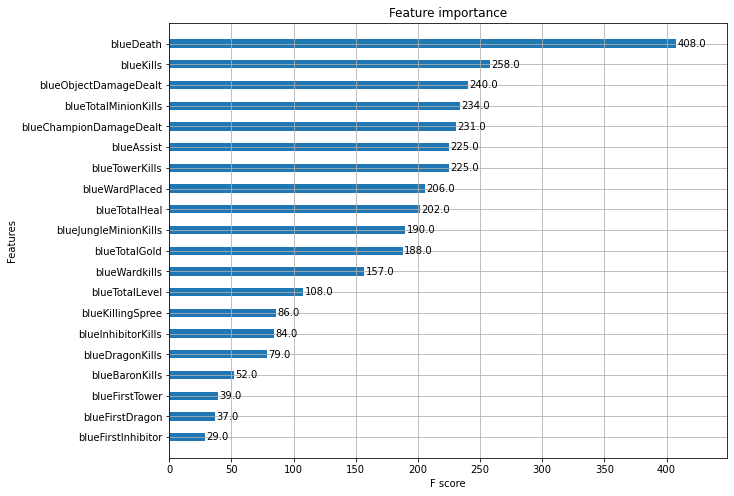

In [160]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10,8))
plot_importance(xgb_clf, ax=ax, max_num_features = 20, height = 0.4)

# 그랜드 마스테 데이터 셋 로딩

In [161]:
lol_gma = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/GrandMaster_Ranked_Games.csv")
lol_gma

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,...,5,35272,35372,506,54,10.8,113,2,17891,24158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,3868504952,1928,0,1,0,0,0,0,2,0,...,60,94554,72361,804,80,16.0,209,10,57739,72450
65892,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455
65893,4100240254,948,1,1,1,0,0,0,1,0,...,3,16574,20972,351,40,8.0,56,0,7138,6808
65894,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124


## 랜덤포레스트 적용

In [ ]:
# FE_split로 이상치 제거 및 데이터 셋(블루팀 기준) 분리
X_train, X_test, y_train, y_test = FE_split(lol_gma)

In [53]:
# GridSearchCV로 하이퍼 파라미터 튜닝을 실시합니다.
params = {'n_estimators':[100],
         'max_depth' : [6,8,10,12],
         'min_samples_leaf' : [8,12,18],
         'min_samples_split' : [8, 16, 20]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

# 최적 하이퍼 파리미터
print(grid_cv.best_params_)

# 최고 예측 정확도
print(grid_cv.best_score_)

{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.9723627473244812


In [54]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
# GridSearch로 찾은 하이퍼 파라미터를 랜덤포레스트에 적용합니다.
rf_clf2 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf2.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[5321  231]
 [  97 5369]]
정확도: 0.9702, 정밀도: 0.9587, 재현율: 0.9823,    F1: 0.9704


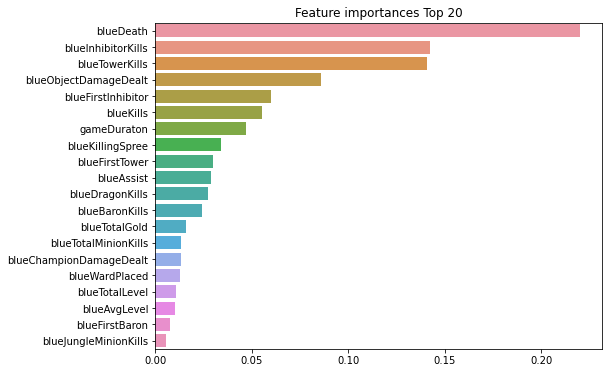

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 트리 계열의 알고리즘들은 feature_importances_에서 feature의 중요도를 알 수 있습니다.

ftr_importances_values = rf_clf2.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## XGBoost 적용

In [162]:
# FE_split_xgboost로 전처리
X_train, X_test, y_train, y_test = FE_split_xgboost(lol_gma)

In [163]:
# 검증을 위해 train데이터를 tr과 val로 분리합니다.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3,
                                           random_state = 0)

In [164]:
from hyperopt import hp
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth' : hp.quniform('max_depth', 5, 15, 1), 
                   'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
                   'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 0.95),
                   'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)}

In [165]:
# cross_val_score()은 XGBoost에서 early_stopping이 적용이 안됨
# 그래서 KFold 방식을 써줌
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환. 
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']),
                           min_child_weight = int(search_space['min_child_weight']),
                           colsample_bytree = search_space['colsample_bytree'],
                           learning_rate = search_space['learning_rate'])
    
    # 3개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 roc_auc 지표를 담을 list 생성.
    roc_auc_list = []
    kf = KFold(n_splits = 3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        # eval_metric : 반복수행시 사용하는 비용 평가 지표 
        # eval_set : 평가를 수행하는 별도의 검증 데이터 세트
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
                   eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        # roc_auc_score(y_true, y_score)
        # y_true : 실제 클래스 값 array
        # y_score : predict_proba()의 반환 값array에서 Positive 칼럼의 예측 확률
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
        # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
        # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
        return -1*np.mean(roc_auc_list)
            

In [166]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn = objective_func,
           space = xgb_search_space,
           algo = tpe.suggest,
           max_evals = 50, # 최대 반복 횟수를 지정합니다.
           trials = trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.98972	validation_1-auc:0.98788                                                                  
[1]	validation_0-auc:0.99121	validation_1-auc:0.99013                                                                  
[2]	validation_0-auc:0.99388	validation_1-auc:0.99358                                                                  
[3]	validation_0-auc:0.99433	validation_1-auc:0.99385                                                                  
[4]	validation_0-auc:0.99509	validation_1-auc:0.99461                                                                  
[5]	validation_0-auc:0.99538	validation_1-auc:0.99478                                                                  
[6]	validation_0-auc:0.99580	validation_1-auc:0.99518                                                                  
[7]	validation_0-auc:0.99611	validation_1-auc:0.99547                                                                  
[8]	validation_0-auc:0.99622	validation_

[36]	validation_0-auc:0.99880	validation_1-auc:0.99632                                                                 
[37]	validation_0-auc:0.99883	validation_1-auc:0.99632                                                                 
[38]	validation_0-auc:0.99885	validation_1-auc:0.99633                                                                 
[39]	validation_0-auc:0.99888	validation_1-auc:0.99639                                                                 
[40]	validation_0-auc:0.99890	validation_1-auc:0.99644                                                                 
[41]	validation_0-auc:0.99893	validation_1-auc:0.99645                                                                 
[42]	validation_0-auc:0.99895	validation_1-auc:0.99643                                                                 
[43]	validation_0-auc:0.99897	validation_1-auc:0.99645                                                                 
[44]	validation_0-auc:0.99899	validation

[72]	validation_0-auc:0.99999	validation_1-auc:0.99721                                                                 
[73]	validation_0-auc:0.99999	validation_1-auc:0.99721                                                                 
[74]	validation_0-auc:0.99999	validation_1-auc:0.99721                                                                 
[75]	validation_0-auc:0.99999	validation_1-auc:0.99720                                                                 
[76]	validation_0-auc:0.99999	validation_1-auc:0.99720                                                                 
[77]	validation_0-auc:0.99999	validation_1-auc:0.99718                                                                 
[78]	validation_0-auc:0.99999	validation_1-auc:0.99718                                                                 
[79]	validation_0-auc:0.99999	validation_1-auc:0.99719                                                                 
[80]	validation_0-auc:0.99999	validation

[8]	validation_0-auc:0.99880	validation_1-auc:0.99605                                                                  
[9]	validation_0-auc:0.99891	validation_1-auc:0.99619                                                                  
[10]	validation_0-auc:0.99905	validation_1-auc:0.99623                                                                 
[11]	validation_0-auc:0.99916	validation_1-auc:0.99630                                                                 
[12]	validation_0-auc:0.99925	validation_1-auc:0.99644                                                                 
[13]	validation_0-auc:0.99936	validation_1-auc:0.99649                                                                 
[14]	validation_0-auc:0.99942	validation_1-auc:0.99654                                                                 
[15]	validation_0-auc:0.99950	validation_1-auc:0.99666                                                                 
[16]	validation_0-auc:0.99953	validation

[69]	validation_0-auc:0.99899	validation_1-auc:0.99712                                                                 
[70]	validation_0-auc:0.99900	validation_1-auc:0.99712                                                                 
[71]	validation_0-auc:0.99902	validation_1-auc:0.99713                                                                 
[72]	validation_0-auc:0.99903	validation_1-auc:0.99714                                                                 
[73]	validation_0-auc:0.99904	validation_1-auc:0.99715                                                                 
[74]	validation_0-auc:0.99905	validation_1-auc:0.99716                                                                 
[75]	validation_0-auc:0.99907	validation_1-auc:0.99714                                                                 
[76]	validation_0-auc:0.99908	validation_1-auc:0.99715                                                                 
[77]	validation_0-auc:0.99909	validation

[5]	validation_0-auc:0.99737	validation_1-auc:0.99534                                                                  
[6]	validation_0-auc:0.99753	validation_1-auc:0.99555                                                                  
[7]	validation_0-auc:0.99775	validation_1-auc:0.99571                                                                  
[8]	validation_0-auc:0.99781	validation_1-auc:0.99576                                                                  
[9]	validation_0-auc:0.99784	validation_1-auc:0.99579                                                                  
[10]	validation_0-auc:0.99793	validation_1-auc:0.99584                                                                 
[11]	validation_0-auc:0.99799	validation_1-auc:0.99589                                                                 
[12]	validation_0-auc:0.99808	validation_1-auc:0.99605                                                                 
[13]	validation_0-auc:0.99828	validation

[41]	validation_0-auc:0.99828	validation_1-auc:0.99712                                                                 
[42]	validation_0-auc:0.99834	validation_1-auc:0.99713                                                                 
[43]	validation_0-auc:0.99837	validation_1-auc:0.99714                                                                 
[44]	validation_0-auc:0.99840	validation_1-auc:0.99716                                                                 
[45]	validation_0-auc:0.99842	validation_1-auc:0.99718                                                                 
[46]	validation_0-auc:0.99847	validation_1-auc:0.99719                                                                 
[47]	validation_0-auc:0.99850	validation_1-auc:0.99720                                                                 
[48]	validation_0-auc:0.99851	validation_1-auc:0.99720                                                                 
[49]	validation_0-auc:0.99856	validation

[86]	validation_0-auc:1.00000	validation_1-auc:0.99708                                                                 
[87]	validation_0-auc:1.00000	validation_1-auc:0.99708                                                                 
[88]	validation_0-auc:1.00000	validation_1-auc:0.99709                                                                 
[89]	validation_0-auc:1.00000	validation_1-auc:0.99708                                                                 
[90]	validation_0-auc:1.00000	validation_1-auc:0.99707                                                                 
[0]	validation_0-auc:0.99206	validation_1-auc:0.98866                                                                  
[1]	validation_0-auc:0.99581	validation_1-auc:0.99197                                                                  
[2]	validation_0-auc:0.99721	validation_1-auc:0.99414                                                                  
[3]	validation_0-auc:0.99738	validation_

[31]	validation_0-auc:0.99986	validation_1-auc:0.99692                                                                 
[32]	validation_0-auc:0.99988	validation_1-auc:0.99690                                                                 
[33]	validation_0-auc:0.99989	validation_1-auc:0.99690                                                                 
[34]	validation_0-auc:0.99990	validation_1-auc:0.99693                                                                 
[35]	validation_0-auc:0.99991	validation_1-auc:0.99700                                                                 
[36]	validation_0-auc:0.99992	validation_1-auc:0.99700                                                                 
[37]	validation_0-auc:0.99993	validation_1-auc:0.99700                                                                 
[38]	validation_0-auc:0.99994	validation_1-auc:0.99703                                                                 
[39]	validation_0-auc:0.99994	validation

[77]	validation_0-auc:0.99852	validation_1-auc:0.99658                                                                 
[78]	validation_0-auc:0.99854	validation_1-auc:0.99660                                                                 
[79]	validation_0-auc:0.99855	validation_1-auc:0.99662                                                                 
[80]	validation_0-auc:0.99856	validation_1-auc:0.99664                                                                 
[81]	validation_0-auc:0.99856	validation_1-auc:0.99666                                                                 
[82]	validation_0-auc:0.99858	validation_1-auc:0.99666                                                                 
[83]	validation_0-auc:0.99859	validation_1-auc:0.99669                                                                 
[84]	validation_0-auc:0.99861	validation_1-auc:0.99670                                                                 
[85]	validation_0-auc:0.99862	validation

[13]	validation_0-auc:0.99643	validation_1-auc:0.99559                                                                 
[14]	validation_0-auc:0.99660	validation_1-auc:0.99583                                                                 
[15]	validation_0-auc:0.99670	validation_1-auc:0.99590                                                                 
[16]	validation_0-auc:0.99672	validation_1-auc:0.99592                                                                 
[17]	validation_0-auc:0.99677	validation_1-auc:0.99595                                                                 
[18]	validation_0-auc:0.99676	validation_1-auc:0.99593                                                                 
[19]	validation_0-auc:0.99681	validation_1-auc:0.99600                                                                 
[20]	validation_0-auc:0.99683	validation_1-auc:0.99601                                                                 
[21]	validation_0-auc:0.99688	validation

[49]	validation_0-auc:0.99992	validation_1-auc:0.99699                                                                 
[50]	validation_0-auc:0.99993	validation_1-auc:0.99699                                                                 
[51]	validation_0-auc:0.99993	validation_1-auc:0.99700                                                                 
[52]	validation_0-auc:0.99994	validation_1-auc:0.99703                                                                 
[53]	validation_0-auc:0.99994	validation_1-auc:0.99702                                                                 
[54]	validation_0-auc:0.99994	validation_1-auc:0.99704                                                                 
[55]	validation_0-auc:0.99995	validation_1-auc:0.99704                                                                 
[56]	validation_0-auc:0.99995	validation_1-auc:0.99702                                                                 
[57]	validation_0-auc:0.99996	validation

[85]	validation_0-auc:0.99897	validation_1-auc:0.99723                                                                 
[86]	validation_0-auc:0.99899	validation_1-auc:0.99723                                                                 
[87]	validation_0-auc:0.99901	validation_1-auc:0.99723                                                                 
[88]	validation_0-auc:0.99902	validation_1-auc:0.99724                                                                 
[89]	validation_0-auc:0.99903	validation_1-auc:0.99723                                                                 
[90]	validation_0-auc:0.99904	validation_1-auc:0.99724                                                                 
[91]	validation_0-auc:0.99906	validation_1-auc:0.99725                                                                 
[92]	validation_0-auc:0.99908	validation_1-auc:0.99724                                                                 
[93]	validation_0-auc:0.99909	validation

[21]	validation_0-auc:0.99887	validation_1-auc:0.99632                                                                 
[22]	validation_0-auc:0.99892	validation_1-auc:0.99628                                                                 
[23]	validation_0-auc:0.99895	validation_1-auc:0.99633                                                                 
[24]	validation_0-auc:0.99899	validation_1-auc:0.99638                                                                 
[25]	validation_0-auc:0.99902	validation_1-auc:0.99644                                                                 
[26]	validation_0-auc:0.99905	validation_1-auc:0.99646                                                                 
[27]	validation_0-auc:0.99907	validation_1-auc:0.99652                                                                 
[28]	validation_0-auc:0.99911	validation_1-auc:0.99658                                                                 
[29]	validation_0-auc:0.99913	validation

[57]	validation_0-auc:0.99864	validation_1-auc:0.99709                                                                 
[58]	validation_0-auc:0.99866	validation_1-auc:0.99710                                                                 
[59]	validation_0-auc:0.99868	validation_1-auc:0.99709                                                                 
[60]	validation_0-auc:0.99870	validation_1-auc:0.99711                                                                 
[61]	validation_0-auc:0.99871	validation_1-auc:0.99712                                                                 
[62]	validation_0-auc:0.99873	validation_1-auc:0.99713                                                                 
[63]	validation_0-auc:0.99877	validation_1-auc:0.99712                                                                 
[64]	validation_0-auc:0.99877	validation_1-auc:0.99713                                                                 
[65]	validation_0-auc:0.99879	validation

[7]	validation_0-auc:0.99530	validation_1-auc:0.99490                                                                  
[8]	validation_0-auc:0.99547	validation_1-auc:0.99504                                                                  
[9]	validation_0-auc:0.99566	validation_1-auc:0.99521                                                                  
[10]	validation_0-auc:0.99577	validation_1-auc:0.99530                                                                 
[11]	validation_0-auc:0.99590	validation_1-auc:0.99538                                                                 
[12]	validation_0-auc:0.99602	validation_1-auc:0.99555                                                                 
[13]	validation_0-auc:0.99619	validation_1-auc:0.99575                                                                 
[14]	validation_0-auc:0.99627	validation_1-auc:0.99579                                                                 
[15]	validation_0-auc:0.99636	validation

[43]	validation_0-auc:0.99760	validation_1-auc:0.99689                                                                 
[44]	validation_0-auc:0.99765	validation_1-auc:0.99693                                                                 
[45]	validation_0-auc:0.99768	validation_1-auc:0.99695                                                                 
[46]	validation_0-auc:0.99770	validation_1-auc:0.99696                                                                 
[47]	validation_0-auc:0.99773	validation_1-auc:0.99697                                                                 
[48]	validation_0-auc:0.99776	validation_1-auc:0.99698                                                                 
[49]	validation_0-auc:0.99779	validation_1-auc:0.99699                                                                 
[50]	validation_0-auc:0.99781	validation_1-auc:0.99701                                                                 
[51]	validation_0-auc:0.99784	validation

[79]	validation_0-auc:0.99899	validation_1-auc:0.99719                                                                 
[80]	validation_0-auc:0.99900	validation_1-auc:0.99721                                                                 
[81]	validation_0-auc:0.99902	validation_1-auc:0.99721                                                                 
[82]	validation_0-auc:0.99902	validation_1-auc:0.99720                                                                 
[83]	validation_0-auc:0.99904	validation_1-auc:0.99721                                                                 
[84]	validation_0-auc:0.99905	validation_1-auc:0.99720                                                                 
[0]	validation_0-auc:0.98670	validation_1-auc:0.98525                                                                  
[1]	validation_0-auc:0.98808	validation_1-auc:0.98736                                                                  
[2]	validation_0-auc:0.99191	validation_

[30]	validation_0-auc:0.99907	validation_1-auc:0.99715                                                                 
[31]	validation_0-auc:0.99911	validation_1-auc:0.99713                                                                 
[32]	validation_0-auc:0.99915	validation_1-auc:0.99714                                                                 
[33]	validation_0-auc:0.99916	validation_1-auc:0.99712                                                                 
[34]	validation_0-auc:0.99922	validation_1-auc:0.99714                                                                 
[35]	validation_0-auc:0.99926	validation_1-auc:0.99712                                                                 
[36]	validation_0-auc:0.99929	validation_1-auc:0.99712                                                                 
[37]	validation_0-auc:0.99930	validation_1-auc:0.99713                                                                 
[38]	validation_0-auc:0.99934	validation

[4]	validation_0-auc:0.99695	validation_1-auc:0.99417                                                                  
[5]	validation_0-auc:0.99728	validation_1-auc:0.99458                                                                  
[6]	validation_0-auc:0.99717	validation_1-auc:0.99435                                                                  
[7]	validation_0-auc:0.99715	validation_1-auc:0.99401                                                                  
[8]	validation_0-auc:0.99726	validation_1-auc:0.99428                                                                  
[9]	validation_0-auc:0.99732	validation_1-auc:0.99443                                                                  
[10]	validation_0-auc:0.99761	validation_1-auc:0.99483                                                                 
[11]	validation_0-auc:0.99770	validation_1-auc:0.99489                                                                 
[12]	validation_0-auc:0.99770	validation

[80]	validation_0-auc:0.99813	validation_1-auc:0.99688                                                                 
[81]	validation_0-auc:0.99815	validation_1-auc:0.99689                                                                 
[82]	validation_0-auc:0.99816	validation_1-auc:0.99690                                                                 
[83]	validation_0-auc:0.99818	validation_1-auc:0.99692                                                                 
[84]	validation_0-auc:0.99820	validation_1-auc:0.99695                                                                 
[85]	validation_0-auc:0.99821	validation_1-auc:0.99695                                                                 
[86]	validation_0-auc:0.99823	validation_1-auc:0.99696                                                                 
[87]	validation_0-auc:0.99824	validation_1-auc:0.99696                                                                 
[88]	validation_0-auc:0.99826	validation

[34]	validation_0-auc:0.99713	validation_1-auc:0.99657                                                                 
[35]	validation_0-auc:0.99716	validation_1-auc:0.99658                                                                 
[36]	validation_0-auc:0.99718	validation_1-auc:0.99661                                                                 
[37]	validation_0-auc:0.99721	validation_1-auc:0.99665                                                                 
[38]	validation_0-auc:0.99723	validation_1-auc:0.99668                                                                 
[39]	validation_0-auc:0.99725	validation_1-auc:0.99669                                                                 
[40]	validation_0-auc:0.99728	validation_1-auc:0.99673                                                                 
[41]	validation_0-auc:0.99731	validation_1-auc:0.99675                                                                 
[42]	validation_0-auc:0.99736	validation

[70]	validation_0-auc:0.99941	validation_1-auc:0.99719                                                                 
[71]	validation_0-auc:0.99943	validation_1-auc:0.99718                                                                 
[72]	validation_0-auc:0.99944	validation_1-auc:0.99719                                                                 
[73]	validation_0-auc:0.99945	validation_1-auc:0.99719                                                                 
[74]	validation_0-auc:0.99946	validation_1-auc:0.99719                                                                 
[75]	validation_0-auc:0.99947	validation_1-auc:0.99718                                                                 
[76]	validation_0-auc:0.99948	validation_1-auc:0.99718                                                                 
[77]	validation_0-auc:0.99949	validation_1-auc:0.99718                                                                 
[78]	validation_0-auc:0.99950	validation

[9]	validation_0-auc:0.99351	validation_1-auc:0.99305                                                                  
[10]	validation_0-auc:0.99417	validation_1-auc:0.99371                                                                 
[11]	validation_0-auc:0.99430	validation_1-auc:0.99380                                                                 
[12]	validation_0-auc:0.99418	validation_1-auc:0.99369                                                                 
[13]	validation_0-auc:0.99423	validation_1-auc:0.99377                                                                 
[14]	validation_0-auc:0.99485	validation_1-auc:0.99442                                                                 
[15]	validation_0-auc:0.99512	validation_1-auc:0.99468                                                                 
[16]	validation_0-auc:0.99517	validation_1-auc:0.99471                                                                 
[17]	validation_0-auc:0.99510	validation

[45]	validation_0-auc:0.99972	validation_1-auc:0.99717                                                                 
[46]	validation_0-auc:0.99974	validation_1-auc:0.99716                                                                 
[47]	validation_0-auc:0.99976	validation_1-auc:0.99716                                                                 
[48]	validation_0-auc:0.99977	validation_1-auc:0.99717                                                                 
[49]	validation_0-auc:0.99979	validation_1-auc:0.99717                                                                 
[50]	validation_0-auc:0.99980	validation_1-auc:0.99718                                                                 
[51]	validation_0-auc:0.99981	validation_1-auc:0.99718                                                                 
[52]	validation_0-auc:0.99983	validation_1-auc:0.99716                                                                 
[53]	validation_0-auc:0.99984	validation

[83]	validation_0-auc:0.99955	validation_1-auc:0.99729                                                                 
[84]	validation_0-auc:0.99956	validation_1-auc:0.99728                                                                 
[85]	validation_0-auc:0.99957	validation_1-auc:0.99728                                                                 
[86]	validation_0-auc:0.99959	validation_1-auc:0.99728                                                                 
[87]	validation_0-auc:0.99959	validation_1-auc:0.99727                                                                 
[88]	validation_0-auc:0.99960	validation_1-auc:0.99727                                                                 
[89]	validation_0-auc:0.99960	validation_1-auc:0.99727                                                                 
[90]	validation_0-auc:0.99961	validation_1-auc:0.99728                                                                 
[91]	validation_0-auc:0.99961	validation

[19]	validation_0-auc:0.99817	validation_1-auc:0.99600                                                                 
[20]	validation_0-auc:0.99823	validation_1-auc:0.99600                                                                 
[21]	validation_0-auc:0.99829	validation_1-auc:0.99605                                                                 
[22]	validation_0-auc:0.99835	validation_1-auc:0.99604                                                                 
[23]	validation_0-auc:0.99839	validation_1-auc:0.99605                                                                 
[24]	validation_0-auc:0.99843	validation_1-auc:0.99610                                                                 
[25]	validation_0-auc:0.99844	validation_1-auc:0.99613                                                                 
[26]	validation_0-auc:0.99845	validation_1-auc:0.99617                                                                 
[27]	validation_0-auc:0.99848	validation

[55]	validation_0-auc:0.99958	validation_1-auc:0.99722                                                                 
[56]	validation_0-auc:0.99959	validation_1-auc:0.99722                                                                 
[57]	validation_0-auc:0.99960	validation_1-auc:0.99722                                                                 
[58]	validation_0-auc:0.99961	validation_1-auc:0.99722                                                                 
[59]	validation_0-auc:0.99962	validation_1-auc:0.99722                                                                 
[60]	validation_0-auc:0.99963	validation_1-auc:0.99723                                                                 
[61]	validation_0-auc:0.99964	validation_1-auc:0.99723                                                                 
[62]	validation_0-auc:0.99965	validation_1-auc:0.99723                                                                 
[63]	validation_0-auc:0.99966	validation

[91]	validation_0-auc:1.00000	validation_1-auc:0.99713                                                                 
[92]	validation_0-auc:1.00000	validation_1-auc:0.99712                                                                 
[93]	validation_0-auc:1.00000	validation_1-auc:0.99713                                                                 
[94]	validation_0-auc:1.00000	validation_1-auc:0.99713                                                                 
[95]	validation_0-auc:1.00000	validation_1-auc:0.99713                                                                 
[96]	validation_0-auc:1.00000	validation_1-auc:0.99712                                                                 
[97]	validation_0-auc:1.00000	validation_1-auc:0.99712                                                                 
[98]	validation_0-auc:1.00000	validation_1-auc:0.99712                                                                 
[99]	validation_0-auc:1.00000	validation

[27]	validation_0-auc:0.99823	validation_1-auc:0.99571                                                                 
[28]	validation_0-auc:0.99831	validation_1-auc:0.99578                                                                 
[29]	validation_0-auc:0.99832	validation_1-auc:0.99579                                                                 
[30]	validation_0-auc:0.99832	validation_1-auc:0.99579                                                                 
[31]	validation_0-auc:0.99834	validation_1-auc:0.99585                                                                 
[32]	validation_0-auc:0.99839	validation_1-auc:0.99583                                                                 
[33]	validation_0-auc:0.99841	validation_1-auc:0.99584                                                                 
[34]	validation_0-auc:0.99844	validation_1-auc:0.99588                                                                 
[35]	validation_0-auc:0.99847	validation

[63]	validation_0-auc:0.99854	validation_1-auc:0.99727                                                                 
[64]	validation_0-auc:0.99855	validation_1-auc:0.99727                                                                 
[65]	validation_0-auc:0.99856	validation_1-auc:0.99727                                                                 
[66]	validation_0-auc:0.99858	validation_1-auc:0.99726                                                                 
[67]	validation_0-auc:0.99861	validation_1-auc:0.99726                                                                 
[68]	validation_0-auc:0.99863	validation_1-auc:0.99726                                                                 
[69]	validation_0-auc:0.99865	validation_1-auc:0.99727                                                                 
[70]	validation_0-auc:0.99866	validation_1-auc:0.99727                                                                 
[71]	validation_0-auc:0.99867	validation

[99]	validation_0-auc:0.99816	validation_1-auc:0.99699                                                                 
[0]	validation_0-auc:0.99138	validation_1-auc:0.98883                                                                  
[1]	validation_0-auc:0.99423	validation_1-auc:0.99154                                                                  
[2]	validation_0-auc:0.99586	validation_1-auc:0.99414                                                                  
[3]	validation_0-auc:0.99610	validation_1-auc:0.99445                                                                  
[4]	validation_0-auc:0.99661	validation_1-auc:0.99501                                                                  
[5]	validation_0-auc:0.99690	validation_1-auc:0.99523                                                                  
[6]	validation_0-auc:0.99731	validation_1-auc:0.99561                                                                  
[7]	validation_0-auc:0.99755	validation_

[54]	validation_0-auc:0.99983	validation_1-auc:0.99685                                                                 
[55]	validation_0-auc:0.99984	validation_1-auc:0.99686                                                                 
[56]	validation_0-auc:0.99985	validation_1-auc:0.99684                                                                 
[57]	validation_0-auc:0.99986	validation_1-auc:0.99687                                                                 
[58]	validation_0-auc:0.99987	validation_1-auc:0.99687                                                                 
[59]	validation_0-auc:0.99987	validation_1-auc:0.99689                                                                 
[60]	validation_0-auc:0.99988	validation_1-auc:0.99693                                                                 
[61]	validation_0-auc:0.99988	validation_1-auc:0.99695                                                                 
[62]	validation_0-auc:0.99989	validation

[90]	validation_0-auc:0.99999	validation_1-auc:0.99688                                                                 
[91]	validation_0-auc:0.99999	validation_1-auc:0.99689                                                                 
[92]	validation_0-auc:0.99999	validation_1-auc:0.99688                                                                 
[93]	validation_0-auc:1.00000	validation_1-auc:0.99688                                                                 
[94]	validation_0-auc:1.00000	validation_1-auc:0.99688                                                                 
[95]	validation_0-auc:1.00000	validation_1-auc:0.99688                                                                 
[96]	validation_0-auc:1.00000	validation_1-auc:0.99688                                                                 
[97]	validation_0-auc:1.00000	validation_1-auc:0.99687                                                                 
[98]	validation_0-auc:1.00000	validation

[26]	validation_0-auc:0.99800	validation_1-auc:0.99620                                                                 
[27]	validation_0-auc:0.99804	validation_1-auc:0.99617                                                                 
[28]	validation_0-auc:0.99806	validation_1-auc:0.99618                                                                 
[29]	validation_0-auc:0.99806	validation_1-auc:0.99619                                                                 
[30]	validation_0-auc:0.99807	validation_1-auc:0.99619                                                                 
[31]	validation_0-auc:0.99808	validation_1-auc:0.99620                                                                 
[32]	validation_0-auc:0.99811	validation_1-auc:0.99618                                                                 
[33]	validation_0-auc:0.99812	validation_1-auc:0.99618                                                                 
[34]	validation_0-auc:0.99814	validation

[62]	validation_0-auc:1.00000	validation_1-auc:0.99712                                                                 
[63]	validation_0-auc:1.00000	validation_1-auc:0.99711                                                                 
[64]	validation_0-auc:1.00000	validation_1-auc:0.99710                                                                 
[65]	validation_0-auc:1.00000	validation_1-auc:0.99711                                                                 
[66]	validation_0-auc:1.00000	validation_1-auc:0.99711                                                                 
[67]	validation_0-auc:1.00000	validation_1-auc:0.99713                                                                 
[68]	validation_0-auc:1.00000	validation_1-auc:0.99713                                                                 
[69]	validation_0-auc:1.00000	validation_1-auc:0.99714                                                                 
[70]	validation_0-auc:1.00000	validation

In [167]:
best

{'colsample_bytree': 0.573806642182039,
 'learning_rate': 0.10994855404897856,
 'max_depth': 5.0,
 'min_child_weight': 1.0}

In [168]:
# n_estimators를 500으로 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = best['learning_rate'],
                       max_depth = int(best['max_depth']),
                       min_child_weight = int(best['min_child_weight']),
                       colsample_bytree = round(best['colsample_bytree'], 5)
                       )

In [169]:
# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

[0]	validation_0-auc:0.98648	validation_1-auc:0.98558
[1]	validation_0-auc:0.98799	validation_1-auc:0.98771
[2]	validation_0-auc:0.99213	validation_1-auc:0.99184
[3]	validation_0-auc:0.99312	validation_1-auc:0.99282
[4]	validation_0-auc:0.99407	validation_1-auc:0.99372
[5]	validation_0-auc:0.99445	validation_1-auc:0.99410
[6]	validation_0-auc:0.99441	validation_1-auc:0.99395
[7]	validation_0-auc:0.99467	validation_1-auc:0.99422
[8]	validation_0-auc:0.99488	validation_1-auc:0.99444
[9]	validation_0-auc:0.99500	validation_1-auc:0.99466
[10]	validation_0-auc:0.99515	validation_1-auc:0.99474
[11]	validation_0-auc:0.99530	validation_1-auc:0.99488
[12]	validation_0-auc:0.99540	validation_1-auc:0.99500
[13]	validation_0-auc:0.99567	validation_1-auc:0.99518
[14]	validation_0-auc:0.99600	validation_1-auc:0.99555
[15]	validation_0-auc:0.99618	validation_1-auc:0.99577
[16]	validation_0-auc:0.99624	validation_1-auc:0.99583
[17]	validation_0-auc:0.99629	validation_1-auc:0.99583
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.57381,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.10994855404897856, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [170]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
xgb_roc_score

0.9972209656551213

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

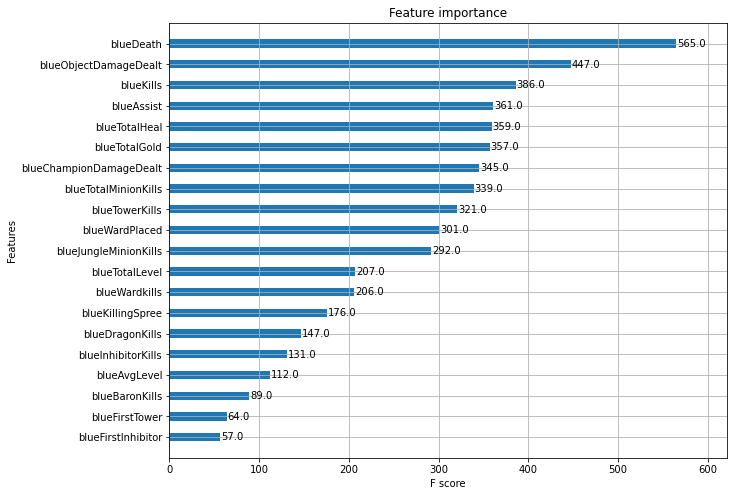

In [171]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10,8))
plot_importance(xgb_clf, ax=ax, max_num_features = 20, height = 0.4)

# 마스터 데이터 셋 로딩

In [172]:
lol_ma = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/Master_Ranked_Games.csv")
lol_ma

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,4031558534,932,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,3882136458,2081,0,1,1,0,0,0,1,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,4137464714,1619,0,0,0,0,0,0,1,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


## 랜덤포레스트 적용

In [ ]:
# FE_split로 전처리
X_train, X_test, y_train, y_test = FE_split(lol_ma)

In [58]:
# GridSearchCV로 하이퍼 파라미터 튜닝을 실시합니다.
params = {'n_estimators':[100],
         'max_depth' : [6,8,10,12],
         'min_samples_leaf' : [8,12,18],
         'min_samples_split' : [8, 16, 20]}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

# 최적 하이퍼 파리미터
print(grid_cv.best_params_)

# 최고 예측 정확도
print(grid_cv.best_score_)

{'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}
0.9719223662457107


In [59]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
# GridSearch로 찾은 하이퍼 파라미터를 랜덤포레스트에 적용합니다.
rf_clf3 = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=20, random_state=0)
rf_clf3.fit(X_train, y_train)
pred = rf_clf3.predict(X_test)

get_clf_eval(y_test, pred)

오차 행렬
[[8880  325]
 [ 153 8637]]
정확도: 0.9734, 정밀도: 0.9637, 재현율: 0.9826,    F1: 0.9731


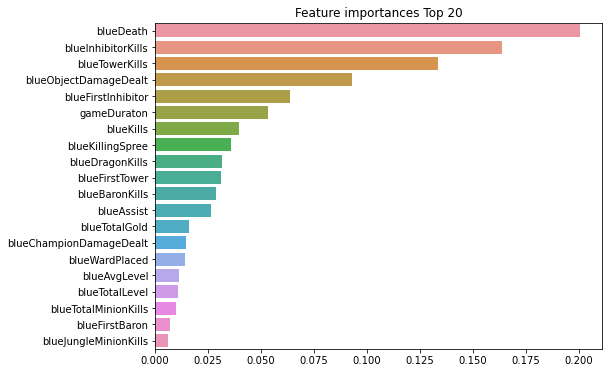

In [60]:
# 트리 계열의 알고리즘들은 feature_importances_에서 feature의 중요도를 알 수 있습니다.

ftr_importances_values = rf_clf3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## XGBoost적용

In [173]:
# FE_split_xgboost로 전처리
X_train, X_test, y_train, y_test = FE_split_xgboost(lol_ma)

In [174]:
# 검증을 위해 train데이터를 tr과 val로 분리합니다.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.3,
                                           random_state = 0)

In [175]:
from hyperopt import hp
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth' : hp.quniform('max_depth', 5, 15, 1), 
                   'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
                   'colsample_bytree' : hp.uniform('colsample_bytree', 0.5, 0.95),
                   'learning_rate' : hp.uniform('learning_rate', 0.01, 0.2)}

In [176]:
# cross_val_score()은 XGBoost에서 early_stopping이 적용이 안됨
# 그래서 KFold 방식을 써줌
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환. 
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators = 100, max_depth = int(search_space['max_depth']),
                           min_child_weight = int(search_space['min_child_weight']),
                           colsample_bytree = search_space['colsample_bytree'],
                           learning_rate = search_space['learning_rate'])
    
    # 3개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 roc_auc 지표를 담을 list 생성.
    roc_auc_list = []
    kf = KFold(n_splits = 3)
    
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        # eval_metric : 반복수행시 사용하는 비용 평가 지표 
        # eval_set : 평가를 수행하는 별도의 검증 데이터 세트
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 30, eval_metric = 'auc',
                   eval_set = [(X_tr, y_tr), (X_val, y_val)])
        
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        # roc_auc_score(y_true, y_score)
        # y_true : 실제 클래스 값 array
        # y_score : predict_proba()의 반환 값array에서 Positive 칼럼의 예측 확률
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
        
        # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
        # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
        return -1*np.mean(roc_auc_list)
            

In [177]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn = objective_func,
           space = xgb_search_space,
           algo = tpe.suggest,
           max_evals = 50, # 최대 반복 횟수를 지정합니다.
           trials = trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.98933	validation_1-auc:0.98814                                                                  
[1]	validation_0-auc:0.99053	validation_1-auc:0.98952                                                                  
[2]	validation_0-auc:0.99367	validation_1-auc:0.99290                                                                  
[3]	validation_0-auc:0.99421	validation_1-auc:0.99343                                                                  
[4]	validation_0-auc:0.99495	validation_1-auc:0.99411                                                                  
[5]	validation_0-auc:0.99522	validation_1-auc:0.99430                                                                  
[6]	validation_0-auc:0.99553	validation_1-auc:0.99462                                                                  
[7]	validation_0-auc:0.99586	validation_1-auc:0.99499                                                                  
[8]	validation_0-auc:0.99596	validation_

[36]	validation_0-auc:0.99877	validation_1-auc:0.99622                                                                 
[37]	validation_0-auc:0.99879	validation_1-auc:0.99620                                                                 
[38]	validation_0-auc:0.99882	validation_1-auc:0.99622                                                                 
[39]	validation_0-auc:0.99884	validation_1-auc:0.99626                                                                 
[40]	validation_0-auc:0.99887	validation_1-auc:0.99630                                                                 
[41]	validation_0-auc:0.99889	validation_1-auc:0.99630                                                                 
[42]	validation_0-auc:0.99891	validation_1-auc:0.99628                                                                 
[43]	validation_0-auc:0.99893	validation_1-auc:0.99626                                                                 
[44]	validation_0-auc:0.99894	validation

[72]	validation_0-auc:0.99996	validation_1-auc:0.99691                                                                 
[73]	validation_0-auc:0.99997	validation_1-auc:0.99692                                                                 
[74]	validation_0-auc:0.99997	validation_1-auc:0.99692                                                                 
[75]	validation_0-auc:0.99997	validation_1-auc:0.99693                                                                 
[76]	validation_0-auc:0.99997	validation_1-auc:0.99692                                                                 
[77]	validation_0-auc:0.99997	validation_1-auc:0.99692                                                                 
[78]	validation_0-auc:0.99997	validation_1-auc:0.99693                                                                 
[79]	validation_0-auc:0.99998	validation_1-auc:0.99693                                                                 
[80]	validation_0-auc:0.99998	validation

[8]	validation_0-auc:0.99879	validation_1-auc:0.99582                                                                  
[9]	validation_0-auc:0.99894	validation_1-auc:0.99595                                                                  
[10]	validation_0-auc:0.99905	validation_1-auc:0.99604                                                                 
[11]	validation_0-auc:0.99914	validation_1-auc:0.99612                                                                 
[12]	validation_0-auc:0.99924	validation_1-auc:0.99618                                                                 
[13]	validation_0-auc:0.99935	validation_1-auc:0.99617                                                                 
[14]	validation_0-auc:0.99940	validation_1-auc:0.99618                                                                 
[15]	validation_0-auc:0.99944	validation_1-auc:0.99626                                                                 
[16]	validation_0-auc:0.99948	validation

[23]	validation_0-auc:0.99678	validation_1-auc:0.99621                                                                 
[24]	validation_0-auc:0.99686	validation_1-auc:0.99628                                                                 
[25]	validation_0-auc:0.99696	validation_1-auc:0.99638                                                                 
[26]	validation_0-auc:0.99700	validation_1-auc:0.99642                                                                 
[27]	validation_0-auc:0.99705	validation_1-auc:0.99645                                                                 
[28]	validation_0-auc:0.99712	validation_1-auc:0.99651                                                                 
[29]	validation_0-auc:0.99715	validation_1-auc:0.99657                                                                 
[30]	validation_0-auc:0.99719	validation_1-auc:0.99660                                                                 
[31]	validation_0-auc:0.99723	validation

[59]	validation_0-auc:0.99824	validation_1-auc:0.99708                                                                 
[60]	validation_0-auc:0.99827	validation_1-auc:0.99709                                                                 
[61]	validation_0-auc:0.99828	validation_1-auc:0.99710                                                                 
[62]	validation_0-auc:0.99829	validation_1-auc:0.99710                                                                 
[63]	validation_0-auc:0.99831	validation_1-auc:0.99710                                                                 
[64]	validation_0-auc:0.99833	validation_1-auc:0.99711                                                                 
[65]	validation_0-auc:0.99835	validation_1-auc:0.99711                                                                 
[66]	validation_0-auc:0.99836	validation_1-auc:0.99711                                                                 
[67]	validation_0-auc:0.99837	validation

[95]	validation_0-auc:0.99862	validation_1-auc:0.99716                                                                 
[96]	validation_0-auc:0.99863	validation_1-auc:0.99716                                                                 
[97]	validation_0-auc:0.99864	validation_1-auc:0.99716                                                                 
[98]	validation_0-auc:0.99864	validation_1-auc:0.99716                                                                 
[99]	validation_0-auc:0.99866	validation_1-auc:0.99716                                                                 
[0]	validation_0-auc:0.96531	validation_1-auc:0.96571                                                                  
[1]	validation_0-auc:0.97162	validation_1-auc:0.97133                                                                  
[2]	validation_0-auc:0.98803	validation_1-auc:0.98769                                                                  
[3]	validation_0-auc:0.99203	validation_

[31]	validation_0-auc:0.99772	validation_1-auc:0.99676                                                                 
[32]	validation_0-auc:0.99776	validation_1-auc:0.99678                                                                 
[33]	validation_0-auc:0.99779	validation_1-auc:0.99680                                                                 
[34]	validation_0-auc:0.99784	validation_1-auc:0.99682                                                                 
[35]	validation_0-auc:0.99787	validation_1-auc:0.99683                                                                 
[36]	validation_0-auc:0.99791	validation_1-auc:0.99685                                                                 
[37]	validation_0-auc:0.99795	validation_1-auc:0.99686                                                                 
[38]	validation_0-auc:0.99799	validation_1-auc:0.99688                                                                 
[39]	validation_0-auc:0.99802	validation

[67]	validation_0-auc:0.99855	validation_1-auc:0.99717                                                                 
[68]	validation_0-auc:0.99857	validation_1-auc:0.99717                                                                 
[69]	validation_0-auc:0.99859	validation_1-auc:0.99718                                                                 
[70]	validation_0-auc:0.99860	validation_1-auc:0.99718                                                                 
[71]	validation_0-auc:0.99861	validation_1-auc:0.99718                                                                 
[72]	validation_0-auc:0.99863	validation_1-auc:0.99718                                                                 
[73]	validation_0-auc:0.99864	validation_1-auc:0.99718                                                                 
[74]	validation_0-auc:0.99866	validation_1-auc:0.99719                                                                 
[75]	validation_0-auc:0.99868	validation

[3]	validation_0-auc:0.99397	validation_1-auc:0.99321                                                                  
[4]	validation_0-auc:0.99498	validation_1-auc:0.99415                                                                  
[5]	validation_0-auc:0.99549	validation_1-auc:0.99470                                                                  
[6]	validation_0-auc:0.99555	validation_1-auc:0.99461                                                                  
[7]	validation_0-auc:0.99555	validation_1-auc:0.99449                                                                  
[8]	validation_0-auc:0.99590	validation_1-auc:0.99491                                                                  
[9]	validation_0-auc:0.99615	validation_1-auc:0.99514                                                                  
[10]	validation_0-auc:0.99643	validation_1-auc:0.99543                                                                 
[11]	validation_0-auc:0.99657	validation

[39]	validation_0-auc:0.99970	validation_1-auc:0.99682                                                                 
[40]	validation_0-auc:0.99972	validation_1-auc:0.99682                                                                 
[41]	validation_0-auc:0.99973	validation_1-auc:0.99682                                                                 
[42]	validation_0-auc:0.99975	validation_1-auc:0.99682                                                                 
[43]	validation_0-auc:0.99975	validation_1-auc:0.99683                                                                 
[44]	validation_0-auc:0.99978	validation_1-auc:0.99685                                                                 
[45]	validation_0-auc:0.99979	validation_1-auc:0.99685                                                                 
[46]	validation_0-auc:0.99981	validation_1-auc:0.99686                                                                 
[47]	validation_0-auc:0.99982	validation

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [178]:
best

{'colsample_bytree': 0.5435605846865051,
 'learning_rate': 0.149751375479223,
 'max_depth': 6.0,
 'min_child_weight': 6.0}

In [179]:
# n_estimators를 500으로 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행
xgb_clf = XGBClassifier(n_estimators = 500, learning_rate = best['learning_rate'],
                       max_depth = int(best['max_depth']),
                       min_child_weight = int(best['min_child_weight']),
                       colsample_bytree = round(best['colsample_bytree'], 5)
                       )

In [180]:
# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 수행
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_tr, y_tr), (X_val, y_val)])

[0]	validation_0-auc:0.97158	validation_1-auc:0.96891
[1]	validation_0-auc:0.97695	validation_1-auc:0.97436
[2]	validation_0-auc:0.99104	validation_1-auc:0.99007
[3]	validation_0-auc:0.99337	validation_1-auc:0.99240
[4]	validation_0-auc:0.99468	validation_1-auc:0.99378
[5]	validation_0-auc:0.99529	validation_1-auc:0.99432
[6]	validation_0-auc:0.99525	validation_1-auc:0.99418
[7]	validation_0-auc:0.99517	validation_1-auc:0.99401
[8]	validation_0-auc:0.99556	validation_1-auc:0.99450
[9]	validation_0-auc:0.99582	validation_1-auc:0.99470
[10]	validation_0-auc:0.99609	validation_1-auc:0.99497
[11]	validation_0-auc:0.99627	validation_1-auc:0.99516
[12]	validation_0-auc:0.99628	validation_1-auc:0.99521
[13]	validation_0-auc:0.99641	validation_1-auc:0.99528
[14]	validation_0-auc:0.99671	validation_1-auc:0.99563
[15]	validation_0-auc:0.99687	validation_1-auc:0.99582
[16]	validation_0-auc:0.99698	validation_1-auc:0.99590
[17]	validation_0-auc:0.99702	validation_1-auc:0.99594
[18]	validation_0-au

[149]	validation_0-auc:0.99935	validation_1-auc:0.99707
[150]	validation_0-auc:0.99936	validation_1-auc:0.99706
[151]	validation_0-auc:0.99936	validation_1-auc:0.99706
[152]	validation_0-auc:0.99937	validation_1-auc:0.99707
[153]	validation_0-auc:0.99938	validation_1-auc:0.99707
[154]	validation_0-auc:0.99938	validation_1-auc:0.99707
[155]	validation_0-auc:0.99939	validation_1-auc:0.99707
[156]	validation_0-auc:0.99939	validation_1-auc:0.99707
[157]	validation_0-auc:0.99940	validation_1-auc:0.99706
[158]	validation_0-auc:0.99940	validation_1-auc:0.99706
[159]	validation_0-auc:0.99941	validation_1-auc:0.99706
[160]	validation_0-auc:0.99941	validation_1-auc:0.99706
[161]	validation_0-auc:0.99941	validation_1-auc:0.99706
[162]	validation_0-auc:0.99941	validation_1-auc:0.99705
[163]	validation_0-auc:0.99942	validation_1-auc:0.99705
[164]	validation_0-auc:0.99942	validation_1-auc:0.99705
[165]	validation_0-auc:0.99942	validation_1-auc:0.99705
[166]	validation_0-auc:0.99943	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.54356,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.149751375479223, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [181]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
xgb_roc_score

0.9971618901781504

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

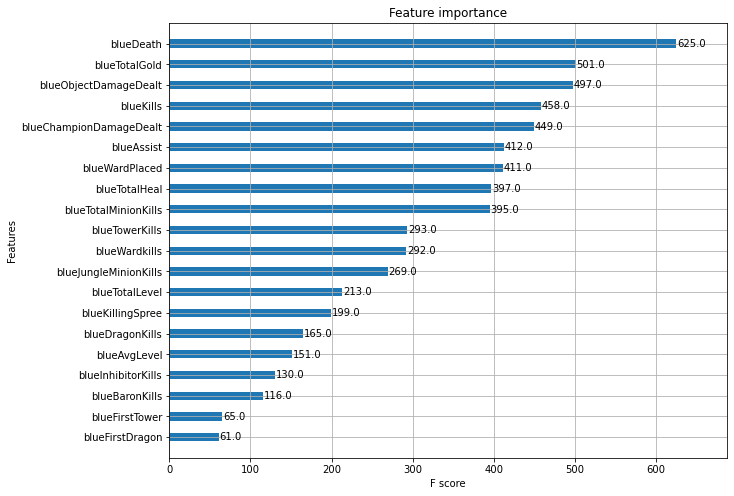

In [184]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize = (10,8))
plot_importance(xgb_clf, ax=ax, max_num_features = 20, height = 0.4)

# 챌린져 데이터로 학습란 랜덤포레스트를 마스터와 그랜드 마스터에 적용

## 그랜드마스터에 적용

In [188]:
lol_gma = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/GrandMaster_Ranked_Games.csv")
lol_gma

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
1,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
2,4233113995,1588,1,1,1,1,0,1,2,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
3,4229230455,1126,1,0,1,0,1,0,1,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775
4,4228244819,1262,1,0,0,0,1,1,3,0,...,5,35272,35372,506,54,10.8,113,2,17891,24158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65891,3868504952,1928,0,1,0,0,0,0,2,0,...,60,94554,72361,804,80,16.0,209,10,57739,72450
65892,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455
65893,4100240254,948,1,1,1,0,0,0,1,0,...,3,16574,20972,351,40,8.0,56,0,7138,6808
65894,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124


In [189]:
# FE_split로 이상치 제거 및 데이터 셋(블루팀 기준) 분리
X_train, X_test, y_train, y_test = FE_split(lol_gma)

In [190]:
# rf_clf1은 챌린져 데이터로 학습하고 파라미터 튜닝을 한 학습기입니다. 
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)

get_clf_eval(y_test, pred)

오차 행렬
[[5337  215]
 [ 102 5364]]
정확도: 0.9712, 정밀도: 0.9615, 재현율: 0.9813,    F1: 0.9713


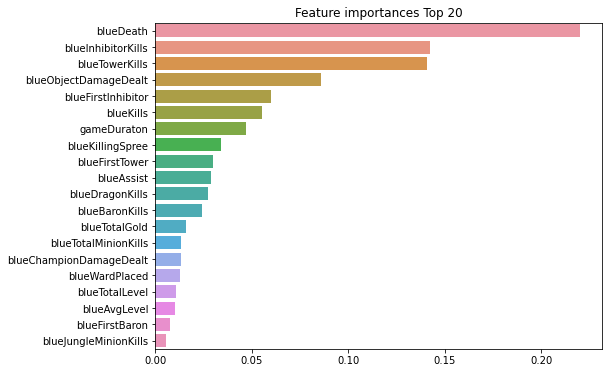

In [191]:
# feature_importances_에서 feature의 중요도를 확인합니다.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 마스터에 적용

In [192]:
lol_ma = pd.read_csv("C:/Users/wkdgu/파이썬을 활용한 데이터 분석-학교수업/팀플/Master_Ranked_Games.csv")
lol_ma

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,4031558534,932,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,3882136458,2081,0,1,1,0,0,0,1,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,4137464714,1619,0,0,0,0,0,0,1,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [193]:
# FE_split로 이상치 제거 및 데이터 셋(블루팀 기준) 분리
X_train, X_test, y_train, y_test = FE_split(lol_gma)

In [194]:
# rf_clf1은 챌린져 데이터로 학습하고 파라미터 튜닝을 한 학습기입니다. 
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)

get_clf_eval(y_test, pred)

오차 행렬
[[5337  215]
 [ 102 5364]]
정확도: 0.9712, 정밀도: 0.9615, 재현율: 0.9813,    F1: 0.9713


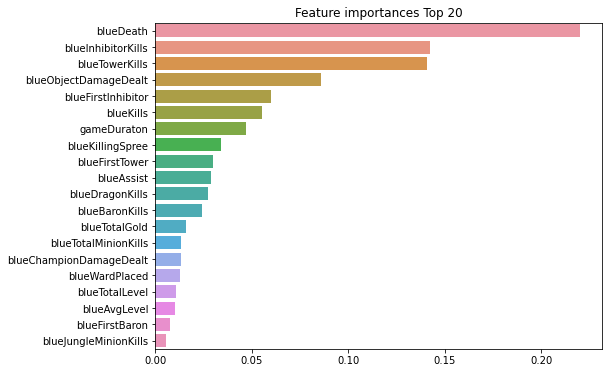

In [195]:
# feature_importances_에서 feature의 중요도를 확인합니다.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()